# Part I - Analyzing Ford GoBike System Data

## by Somood Musleh



## Introduction


[Ford GoBike System Data](https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv)  (38 MB, CSV File)

Ford GoBike is a regional public bicycle sharing system in the San Francisco Bay Area, California. Beginning operation in August 2013 as Bay Area Bike Share, the Ford GoBike system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially launched as Ford GoBike in a partnership with Ford Motor Company.
Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

**The Data Each trip is anonymized and includes:**
- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)


## Preliminary Wrangling

In [75]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [76]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [77]:
df.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

In [78]:
df.shape

(183412, 16)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [80]:
df.describe()

duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.000000             37.770407   
50%                -122.398285      100.000000             37.781010   
75%                -122.286533      235.000000             37.797320   
max                -121.874119      398.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year  
count          183412.000000  183412.000000      175147.000000  
mean             -122.352250    4472.906375        1984.806437  
std                 0.116673    1664.383394          10.116689  
min              -122.453704      11.000000        1878.000000  
25%              -122.411726    3777.000000        1980.000000  
50%              -122.398279    4958.000000        1987.000000  
75%              -122.288045    5502.000000        1992.000000  
max              -121.874119    6645.000000        2001.000000

In [81]:
# Check column dtype for each column
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [82]:
# Check null value for each column
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [83]:

# Check duplicated row
df.duplicated().sum()

np.int64(0)

**What we will do for this dataframe is :-**
- change columns dtype properly based on it's value (start_time and end_time from object to datetime , bike_share_for_all_trip from object to boolean, member_birth_year from float to int , member_gender and user_type from object to category)
-  drop  null row in column( start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, member_gender) .
- As always, we need to copy our dataframe before do any cleaning process, so we can refer back to the old ones.

In [84]:
df_clean = df.copy()

In [85]:
# change the data type for start and end time to be datetime64[ns]
df_clean.start_time = pd.to_datetime(df.start_time)
df_clean.end_time = pd.to_datetime(df.end_time)

In [86]:
# change the data type for bike_share_for_all_trip to be bool
df_clean.bike_share_for_all_trip = (df.bike_share_for_all_trip == 'Yes')

In [87]:
# change the data type for bike_share_for_all_trip to be bool
df_clean.dropna(inplace= True)

In [88]:
df_clean.shape

(174952, 16)

In [89]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type            

In [90]:
df_clean.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [91]:
# Extract dayofweek, hours information from the start_time
df_clean['start_time_dayofweek']= df_clean['start_time'].dt.strftime('%a')
df_clean['start_time_hour']= df_clean['start_time'].dt.hour

In [92]:
# Convert the start_time_dayofweek to ordinal variables.
weekdays = ['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun']
ordered_weekdays = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
df_clean['start_time_dayofweek'] = df_clean['start_time_dayofweek'].astype(ordered_weekdays)

In [93]:
# Calculate member_age from member_birth_year.(2019 the year of Gathering this data)
df_clean['member_age'] = 2019 - df_clean['member_birth_year']

In [94]:
df_clean['member_age'] = df_clean['member_age'].astype(int)
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype(int)

In [95]:
df_clean['member_gender'] = df_clean['member_gender'].astype('category')
df_clean['user_type'] = df_clean['user_type'].astype('category')
df_clean['start_time_hour'] = df_clean['start_time_hour'].astype('category')


In [96]:
df_clean.head()

duration_sec              start_time                end_time  \
0         52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
2         61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3         36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4          1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   
5          1793 2019-02-28 23:49:58.632 2019-03-01 00:19:51.760   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   
5              93.0                      4th St at Mission Bay Blvd S   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   
5               37.770407              -122.391198           323.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   
5                            Broadway at Kearny             37.798014   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer               1984   
2            -122.404904     5905    Customer               1972   
3            -122.444293     6638  Subscriber               1989   
4            -122.248780     4898  Subscriber               1974   
5            -122.405950     5200  Subscriber               1959   

  member_gender  bike_share_for_all_trip start_time_dayofweek start_time_hour  \
0          Male                    False                  Thu              17   
2          Male                    False                  Thu              12   
3         Other                    False                  Thu              17   
4          Male                     True                  Thu              23   
5          Male                    False                  Thu              23   

   member_age  
0          35  
2          47  
3          30  
4          45  
5          60

In [97]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174952 entries, 0 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type            

### What is the structure of your dataset?

** The dataset has 174952 bike rides that happen in 2019 in the San Francisco Bay Area. The dataset contains 19 features about:**

> - trip duration: how long the trip took in seconds
> - start time/end time: start/end date/time for the bike rides.
> - stations: start/end station, name, geolocation (latitude/longitude)
> - anonymized customer data: gender, birth date and user type
> - rented bikes: bike id

** The dataset was further enhanced with features that I may find neccessary to perform interesting analysis: **
> - rental time: hour of the day, weekday
> - customer: age

> Most variables are 10 numerical, and others are 2 datetime, 2 object type , 4 category dtype and 1 is boolean type.

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out how trip duration is dependent on other features such as: age, start station, end station, user type, and gender from the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that trip duration will have the strongest effect on each the start stations and end stations becouse the crowded places should receive more rides. I also think that user_type, age, and gender will have effects on trip duration.

## Univariate Exploration

> I'll start by looking at the distribution of the main variable of interest: duration_sec.


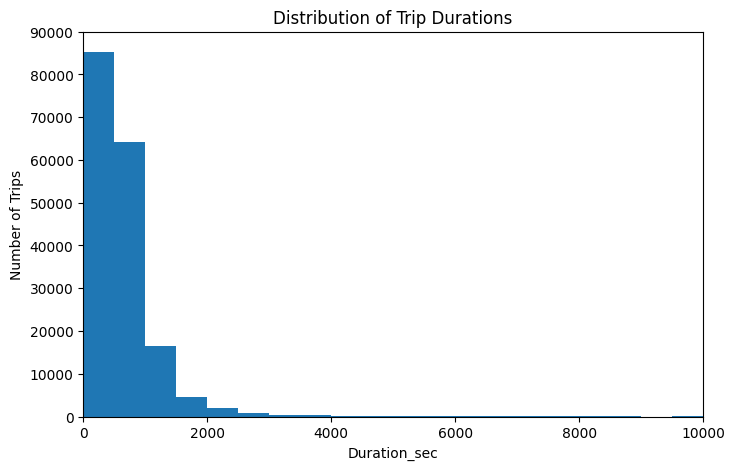

In [98]:
binsize = 500
bins = np.arange(0, df_clean['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'duration_sec', bins = bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration_sec')
plt.ylabel('Number of Trips')
plt.axis([0, 10000, 0, 90000])
plt.show()

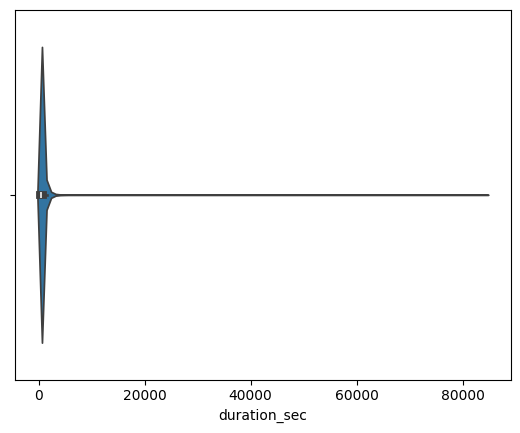

In [99]:
sns.violinplot(data = df_clean, x = 'duration_sec');

It's seems that most data are below 2000. Let's find out the distribution.

In [100]:
describe_duration_sec = df_clean['duration_sec'].describe()
describe_duration_sec

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

**The data is not distributed normally. Let's calculate the IQR and Upper Wisker Bound :**


In [101]:
IQR = describe_duration_sec['75%'] - describe_duration_sec['25%']
Upper_Wisker_Bound = 1.5*IQR + describe_duration_sec['75%']
print(Upper_Wisker_Bound)
Lower_Wisker_Bound = 1.5*IQR - describe_duration_sec['25%']
print(Lower_Wisker_Bound)

1488.0
376.0


C:\Users\acer\AppData\Local\Temp\ipykernel_11136\2902543463.py:12: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.axis([0, 10000, 0, 7000])


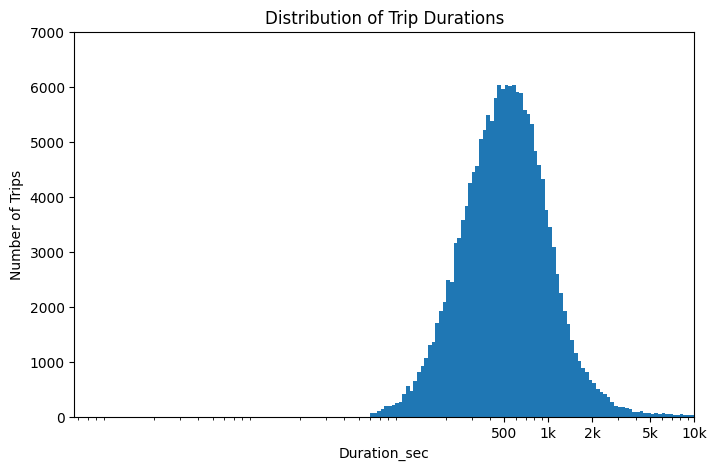

In [102]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df_clean['duration_sec'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'duration_sec', bins = bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration_sec')
plt.ylabel('Number of Trips')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4], [500, '1k', '2k', '5k', '10k'])
plt.axis([0, 10000, 0, 7000])
plt.show()


The distribution now looks closer to normal distribution. But, there is a long tail still. Let's remove the long tail.

In [103]:
# Leave records with duration_min < 5000sec
df_clean = df_clean[(df_clean['duration_sec'] <= 5000) ]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174068 entries, 4 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174068 non-null  int64         
 1   start_time               174068 non-null  datetime64[ns]
 2   end_time                 174068 non-null  datetime64[ns]
 3   start_station_id         174068 non-null  float64       
 4   start_station_name       174068 non-null  object        
 5   start_station_latitude   174068 non-null  float64       
 6   start_station_longitude  174068 non-null  float64       
 7   end_station_id           174068 non-null  float64       
 8   end_station_name         174068 non-null  object        
 9   end_station_latitude     174068 non-null  float64       
 10  end_station_longitude    174068 non-null  float64       
 11  bike_id                  174068 non-null  int64         
 12  user_type            

C:\Users\acer\AppData\Local\Temp\ipykernel_11136\2902543463.py:12: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.axis([0, 10000, 0, 7000])


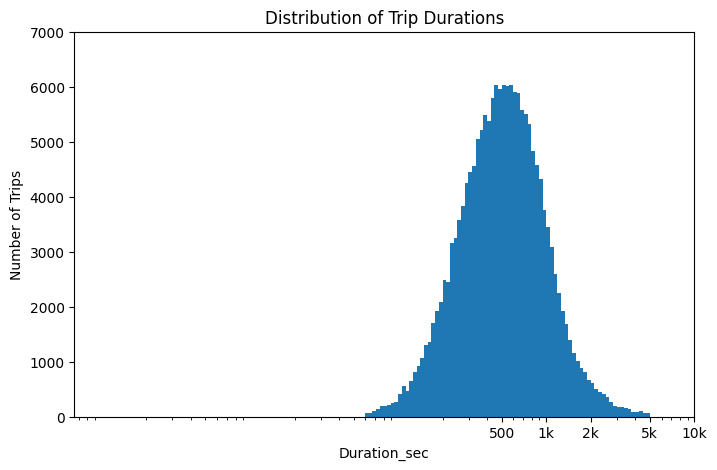

In [104]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df_clean['duration_sec'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'duration_sec', bins = bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration_sec')
plt.ylabel('Number of Trips')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4], [500, '1k', '2k', '5k', '10k'])
plt.axis([0, 10000, 0, 7000])
plt.show()


> Trip duration is mostly centered on values which are less than 4000 seconds with peak around 550 seconds. Number of Trips values first increases starting from around 5000 values to 6500 values at around 600 seconds but then starts to fall below at 1000 values under 2000 seconds.


> Let's look at member age now.

In [105]:
df_clean['member_age'].describe()

count    174068.000000
mean         34.191810
std          10.117383
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

Note: max age is 141! Not usual.

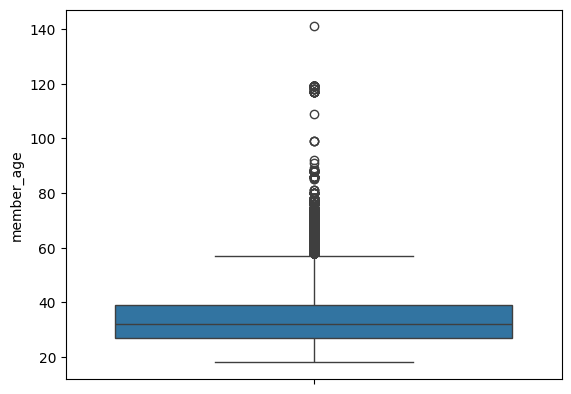

In [106]:
sns.boxplot(data = df_clean, y = 'member_age');

The data is not distributed evenly. Let's calculate the IQR and Upper Wisker Bound

In [107]:
describe_age = df_clean['member_age'].describe()
IQR = describe_age['75%'] - describe_age['25%']
upper_wisker_bound = 1.5 * IQR + describe_age['75%']
upper_wisker_bound

np.float64(57.0)

In [108]:
# Let's remove outliers. Only keep records with member_age below 60.
df_clean = df_clean[df_clean['member_age'] <= 60]

In [109]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170557 entries, 4 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             170557 non-null  int64         
 1   start_time               170557 non-null  datetime64[ns]
 2   end_time                 170557 non-null  datetime64[ns]
 3   start_station_id         170557 non-null  float64       
 4   start_station_name       170557 non-null  object        
 5   start_station_latitude   170557 non-null  float64       
 6   start_station_longitude  170557 non-null  float64       
 7   end_station_id           170557 non-null  float64       
 8   end_station_name         170557 non-null  object        
 9   end_station_latitude     170557 non-null  float64       
 10  end_station_longitude    170557 non-null  float64       
 11  bike_id                  170557 non-null  int64         
 12  user_type            

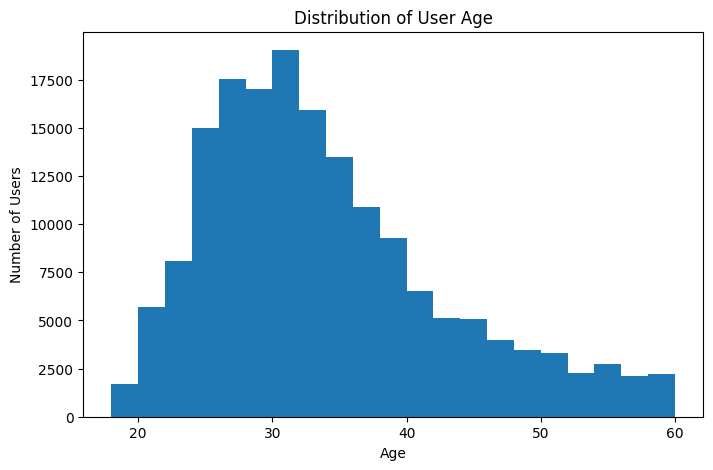

In [110]:
# Plotting age distribution derived from member's birth year.
binsize = 2
bins = np.arange(describe_age['min'], df_clean['member_age'].astype(int).max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'member_age', bins = bins)
plt.title('Distribution of User Age')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()


> The data is not distributed evenly. Many cyclists are around 30 years old. Not many cyclists are over 40 years old.

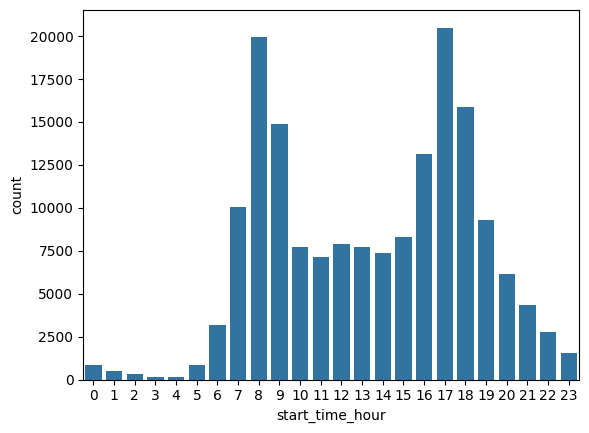

In [111]:
sns.countplot(data = df_clean, x = 'start_time_hour');

> 8:00 AM and 5:00 PM are the two peak hours with the most cyclists.
> And Most trips are during the day not in night.

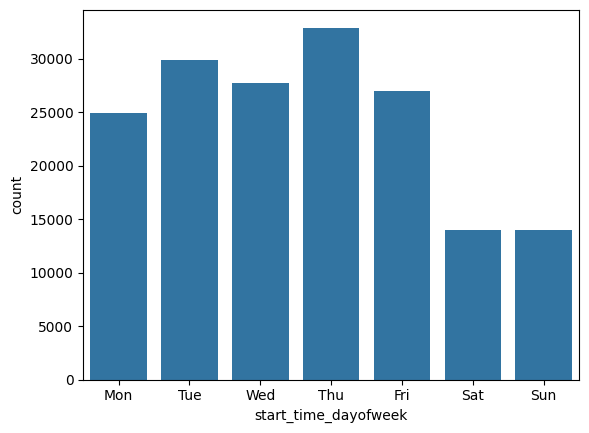

In [112]:
sns.countplot(data = df_clean, x = 'start_time_dayofweek');

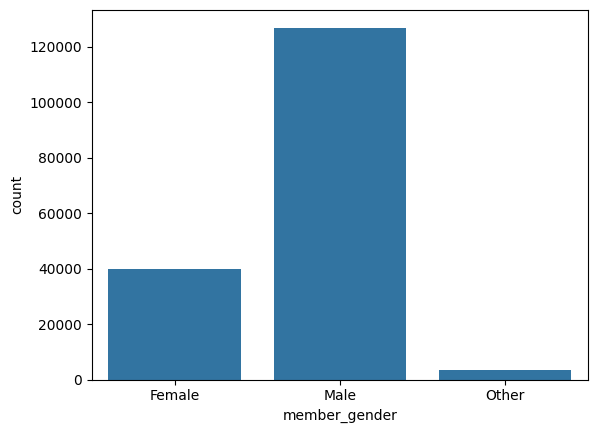

In [113]:
sns.countplot(data = df_clean, x = 'member_gender');

> There are about three times as many male cyclists as female cyclists.

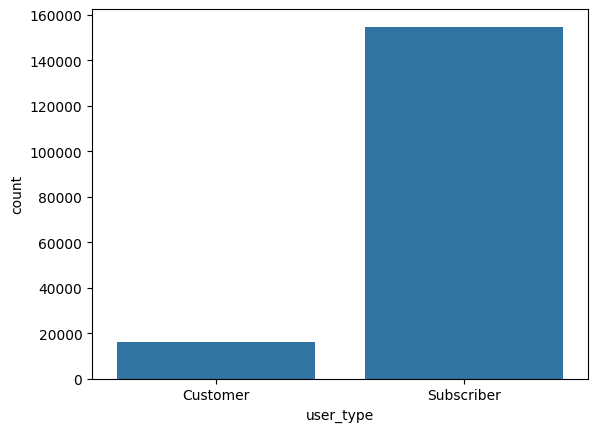

In [114]:
sns.countplot(data = df_clean, x = 'user_type');

There are more subscribers than customer.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The main variable of interest, `duration_sec`, had a highly skewed distribution. Most trips were shorter than 2,000 seconds, with a peak around 550 seconds. There was a long tail in the distribution due to a small number of trips with excessively high durations, which made it challenging to interpret patterns.  

> To address this, a log transformation was applied to the `duration_sec` variable to make the distribution closer to normal. Despite the transformation, some long-tail effects remained, prompting further data cleaning to exclude trips exceeding 4,000 seconds. This threshold was chosen based on the interquartile range (IQR) and upper whisker bound, which showed that these outliers were likely unrepresentative of typical trips.  

> Other notable unusual points included:
> - **`member_age`**: The distribution showed most users were around 30 years old, with a sharp decline after 40. There was an extreme outlier with a calculated age of 141, which was likely due to erroneous or missing data. Data cleaning was performed to exclude users older than 60 years. This was based on domain knowledge that such values were implausible for regular cyclists.
> - **`start_time_hour`**: The distribution revealed two prominent peaks at 8:00 AM and 5:00 PM, suggesting heavy usage during typical commute hours. This pattern aligns with the expected behavior for a bike-sharing system in an urban area.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> **Several operations were performed to tidy and clean the data:**
> 1. **Null values**: Rows with missing data in key columns like `start_station_name`, `end_station_name`, `member_birth_year`, and `member_gender` were dropped to ensure the dataset's integrity.
> 2. **Data types**: Variables like `start_time` and `end_time` were converted to datetime formats, while categorical variables such as `member_gender` were adjusted to improve processing.
> 3. **Derived features**: Additional variables, such as `start_time_dayofweek`, `start_time_hour`, and `member_age`, were created to enable more meaningful analysis.
> 4. **Outlier removal**: Long-duration trips and implausibly high ages were removed to focus on typical user behavior and reduce skewness in the distributions.

> These transformations improved the data's usability and ensured the insights were accurate and reflective of real-world patterns.

## Bivariate Exploration

> 

In [115]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170557 entries, 4 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             170557 non-null  int64         
 1   start_time               170557 non-null  datetime64[ns]
 2   end_time                 170557 non-null  datetime64[ns]
 3   start_station_id         170557 non-null  float64       
 4   start_station_name       170557 non-null  object        
 5   start_station_latitude   170557 non-null  float64       
 6   start_station_longitude  170557 non-null  float64       
 7   end_station_id           170557 non-null  float64       
 8   end_station_name         170557 non-null  object        
 9   end_station_latitude     170557 non-null  float64       
 10  end_station_longitude    170557 non-null  float64       
 11  bike_id                  170557 non-null  int64         
 12  user_type            

> To start off with, I want to look at the pairwise correlations present between features in the data.

#### Pairwise Correlation Heatmap
> - Explore relationships between numeric variables.
> - A heatmap shows the correlation coefficients, where:
>     - `1.0` indicates a strong positive correlation.
>     - `-1.0` indicates a strong negative correlation.
>     - `0` indicates no correlation.
>- Use a diverging colormap to highlight patterns.


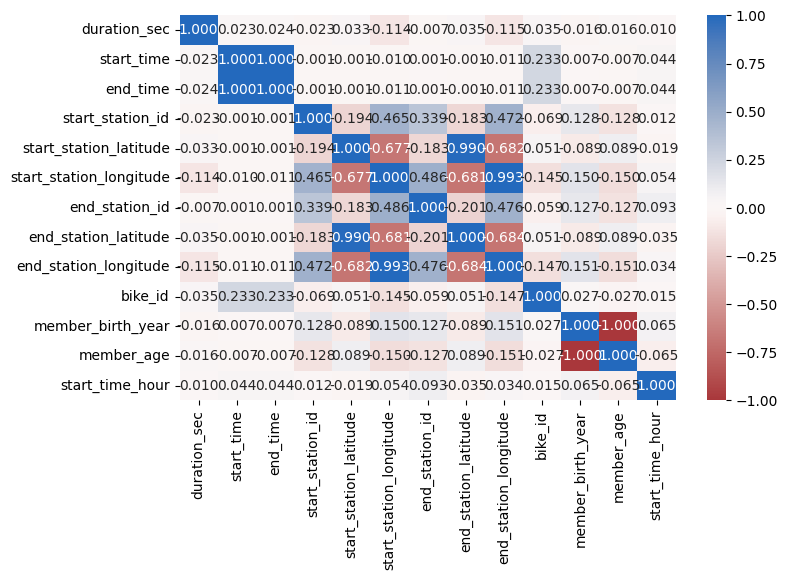

In [116]:
# correlation plot
numeric_vars = ['duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude',
'end_station_longitude', 'bike_id', 'member_birth_year', 'member_age','start_time_hour']
plt.figure(figsize = [8, 5])
sns.heatmap(df_clean[numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.show()

**The correlation cofficients indicate there might be correlations between the following pairs of variables: (start_station_id, end_station_id), (start_station_latitude, start_station_longitude), and (end_station_latitude, end_station_longitude). However, there are no strong evidences to support these. So these might happen just by accident.**

#### Pair Plots for Numeric Variables
> - Use pair plots to explore relationships between specific numeric variables.
> - Sample data for better clarity and faster rendering.
> - Diagonal: Histograms of individual variables.
> - Off-diagonal: Scatter plots of variable relationships.


df_clean.shape= (170557, 19)
df_clean_samp.shape= (500, 19)


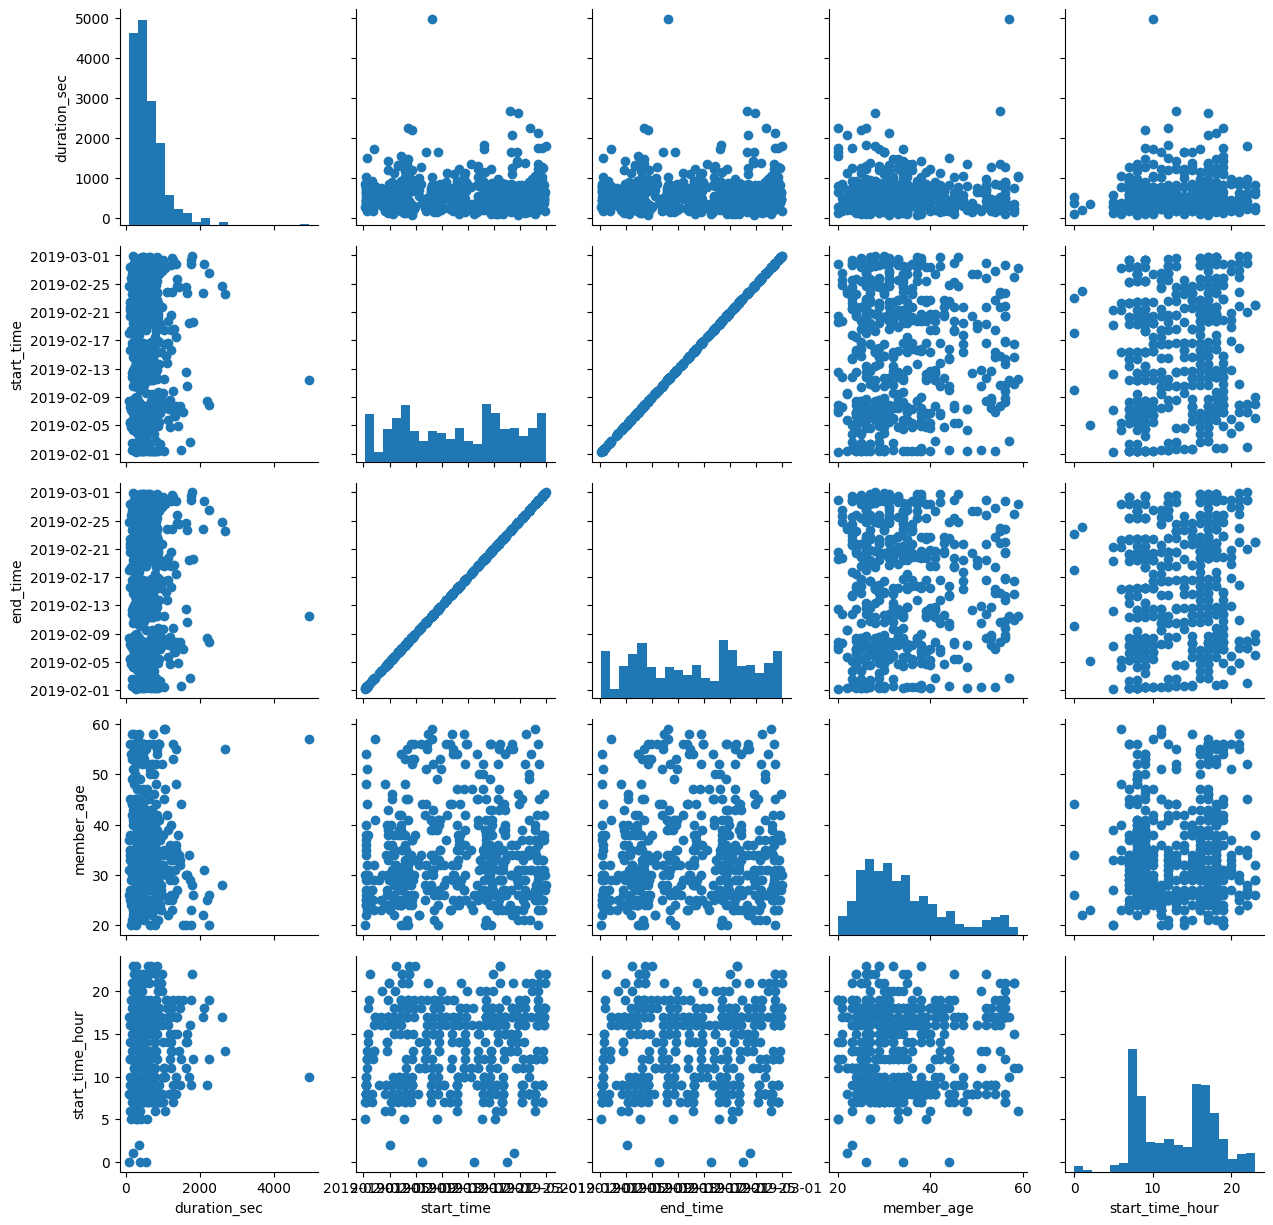

In [117]:
numeric_va = ['duration_sec', 'start_time', 'end_time', 'member_age','start_time_hour']

# plot matrix: sample 500 diamonds so that plots are clearer and they render faster
print("df_clean.shape=",df_clean.shape)
df_clean_samp = df_clean.sample(n=500, replace = False)
print("df_clean_samp.shape=",df_clean_samp.shape)

g = sns.PairGrid(data = df_clean_samp, vars = numeric_va)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

**There is no specific relationship (like linear) between duration_sec and member_age.**

#### Boxplots: Categorical vs. Numeric Variables
> - Visualize the relationships between categorical and numeric variables.
> - Use a sample to reduce clutter in the plots.
> - Boxplots show the spread of numeric variables (e.g., trip duration) for each category.


<Figure size 1500x1500 with 0 Axes>

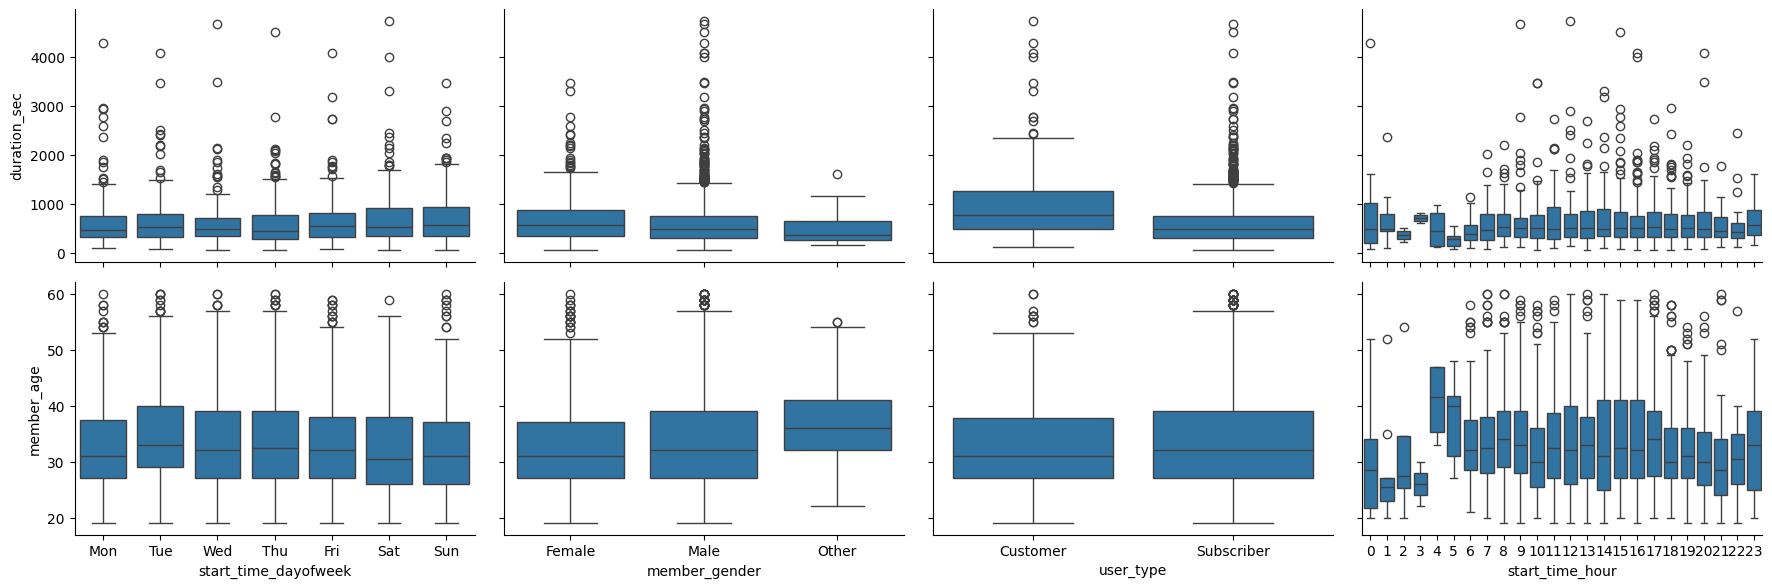

In [118]:
# Define categoric variables
categoric_vars = ['start_time_dayofweek', 'member_gender', 'user_type', 'start_time_hour']

# Check the size of df_clean and adjust the sample size
sample_size = min(2000, df_clean.shape[0])

# Sample random rows
samples = np.random.choice(df_clean.shape[0], sample_size, replace=False)
samp = df_clean.iloc[samples, :]

# Define custom boxplot function
def boxgrid(x, y, **kwargs):
    """Quick hack for creating box plots with seaborn's PairGrid."""
    default_color = sns.color_palette()[0]
    sns.boxplot(x=x, y=y, color=default_color)  # Pass x and y as keyword arguments

# Create PairGrid plot
plt.figure(figsize=[15, 15])
g = sns.PairGrid(data=samp, y_vars=['duration_sec', 'member_age'], x_vars=categoric_vars, height=3, aspect=1.5)
g.map(boxgrid)
plt.show()


**Observations from above plots:**
> - Bike rides on Saturday and Sunday have longer durations compared to bike rides on other weekdays.
> - Bike rides start between 5:00 AM to 6:00 PM have the longest mean durations compared to other time frames.
> - On average, female cyclists ride longer than male cyclists.
> - On average, cyclists who are not members (or suscribers) ride longer than cyclists who are subscribers.
> - The average age of cyclists on Tuesday and Wednesday are older than that of cyclists on other days.
> - The average age of cyclists on Sunday is younger than that of cyclists on other days.
> - The average age of cyclists who start cycling between 6:00 AM to 7:00 AM is older than that of cyclists who start cycling at other time frames.
> - The average age of male cyclists is older than that of female cyclists.
> - The average age of cyclists who are subscribers is older than that of cyclists who are not subscribers.
> - Interestingly, we can see that higher percentage of customer rides longer trips then subscriber although number of subscriber riders are very high then customer.

#### Countplots for Categorical Relationships
> - Compare counts of categorical variables across different groupings.
> - For example:
>      - How does trip hour relate to user type?
>      - How does member gender compare with trip duration?
> - Each subplot focuses on a different categorical comparison.


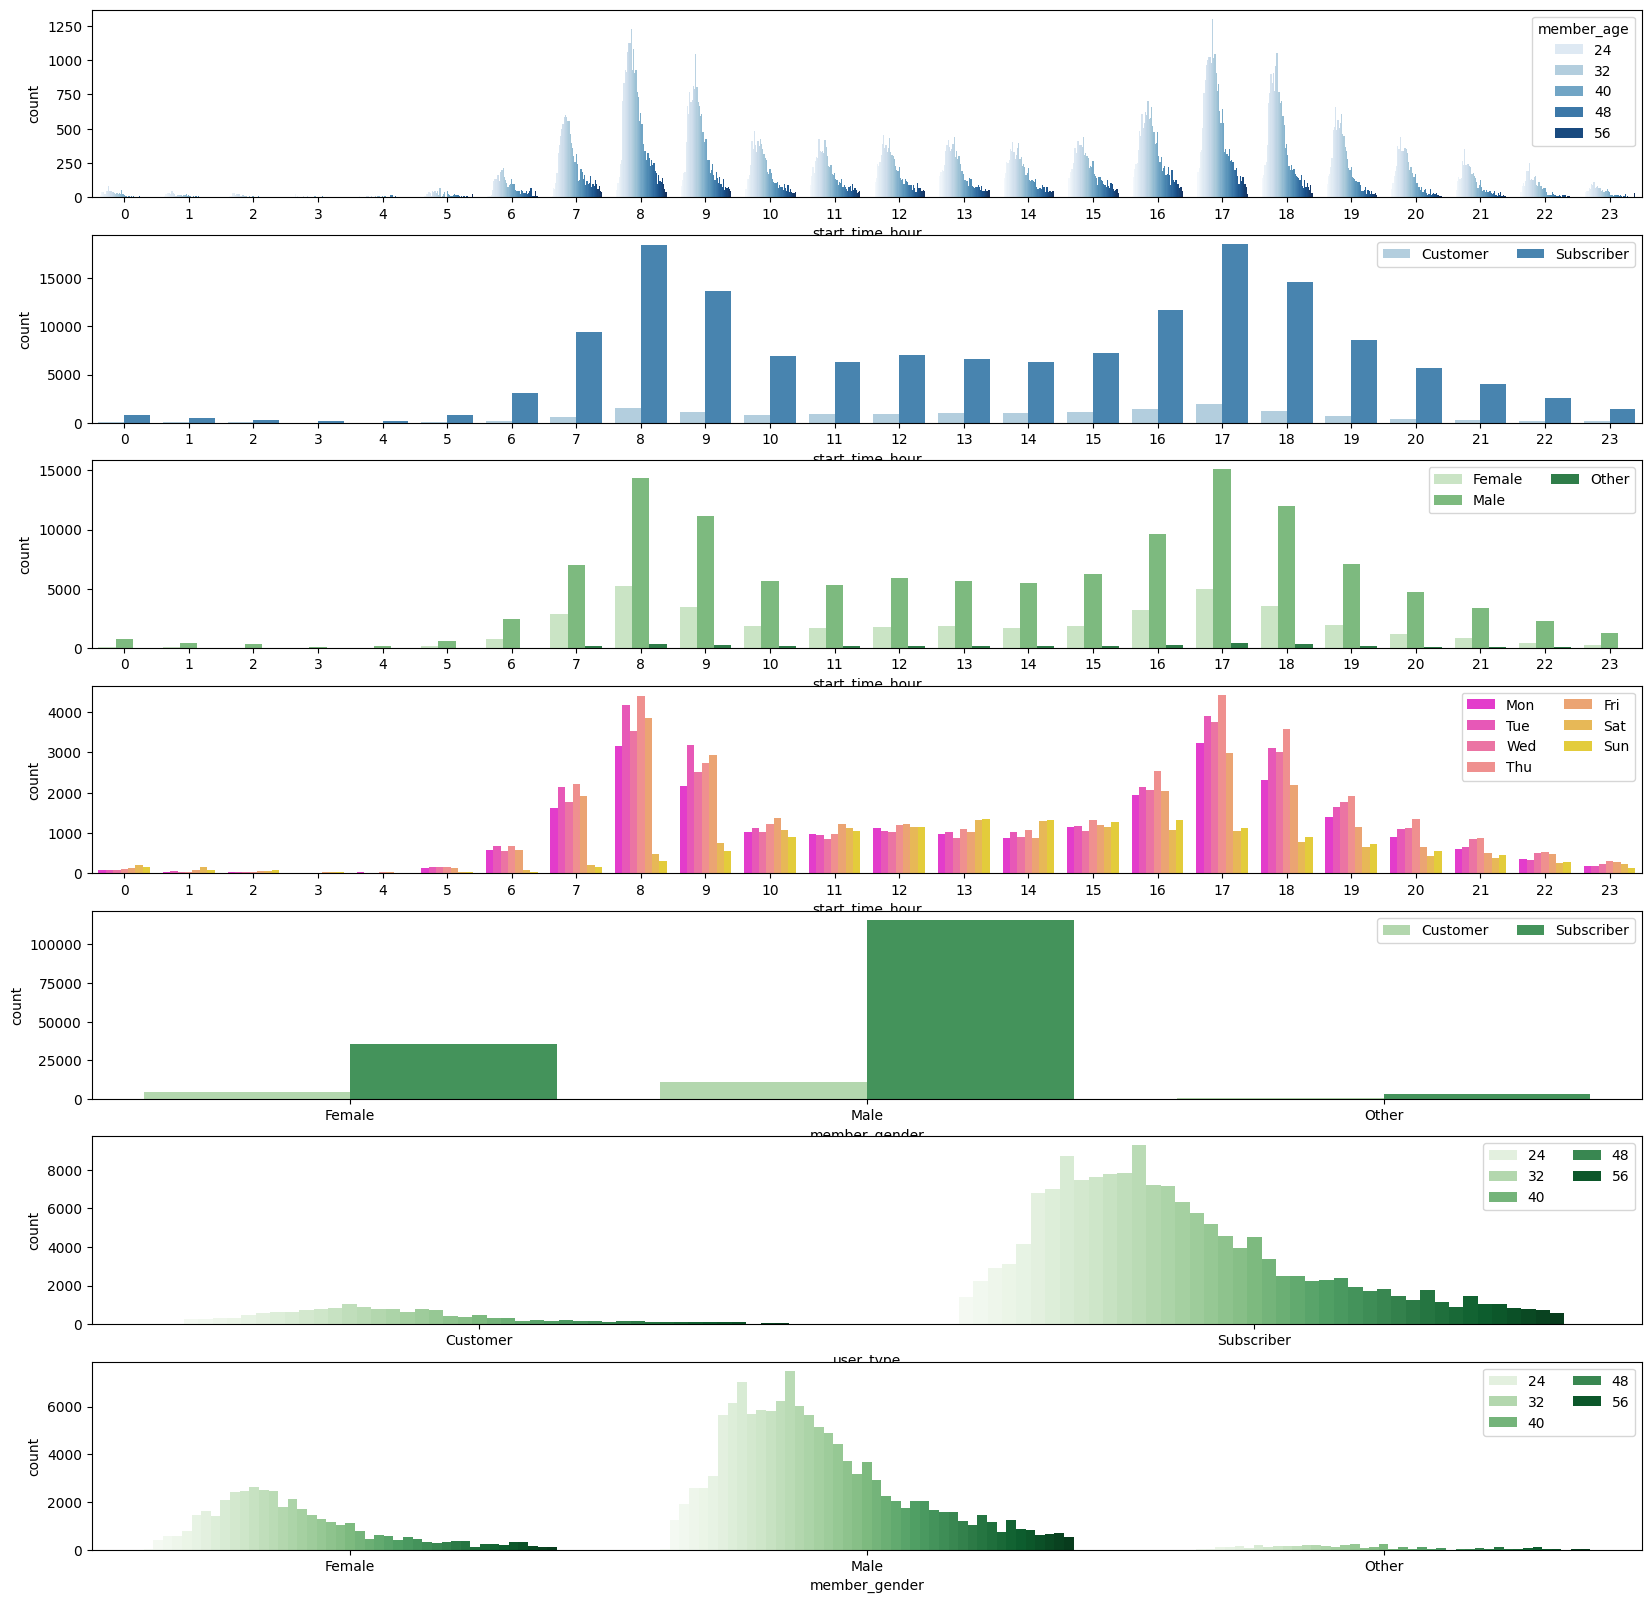

In [119]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [20, 20])

# subplot 1: start_time_hour vs member_age
plt.subplot(7, 1, 1);
sns.countplot(data = df_clean, x = 'start_time_hour', hue = 'member_age', palette = 'Blues')

# subplot 2: start_time_hour vs. user_type
ax = plt.subplot(7, 1, 2)
sns.countplot(data = df_clean, x = 'start_time_hour', hue = 'user_type', palette = 'Blues')
ax.legend(ncol = 2) 

# subplot 3: start_time_hour vs. member_gender
ax = plt.subplot(7, 1, 3)
sns.countplot(data = df_clean, x = 'start_time_hour', hue = 'member_gender', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) 

# subplot 4: start_time_hour vs. start_time_dayofweek
ax = plt.subplot(7, 1, 4)
sns.countplot(data = df_clean, x = 'start_time_hour', hue = 'start_time_dayofweek', palette = 'spring')
ax.legend(loc = 1, ncol = 2) 

# subplot 5: member_gender vs. user_type
ax = plt.subplot(7, 1, 5)
sns.countplot(data = df_clean, x = 'member_gender', hue = 'user_type', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) 

# subplot 6: user_type vs. member_age
ax = plt.subplot(7, 1, 6)
sns.countplot(data = df_clean, x = 'user_type', hue = 'member_age', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) 

# subplot 6: member_gender vs. member_age
ax = plt.subplot(7, 1, 7)
sns.countplot(data = df_clean, x = 'member_gender', hue = 'member_age', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) 


plt.show()

**Observations from above plots:**
> - There are the most subscriber type cyclists at 5:00 PM. There are the most non-subscriber type cyslists at 5:00 PM too.
> - There are the most male cyclists at 5:00 PM. There are the most female cyclists at 8:00 AM and 5:00 PM.
> - There are the most cyclists at 5:00 PM on Tuesday.
> - There are the most male cyclists on Tuesday. There are the most female cyclists on Tuesday too.
> - There are the most subscriber type cyclists on Tuesday. There are the most customer type cyclists on Saturday.
> - Most subscriber type cyclists are male. Most non-subscriber type cyclists are male too.


#### Scatter Plots: Member Age vs. Trip Duration
> - Explore how trip duration varies with member age.
> - Use a log scale for better visualization of large values.
> - Randomly sample data points for clarity.


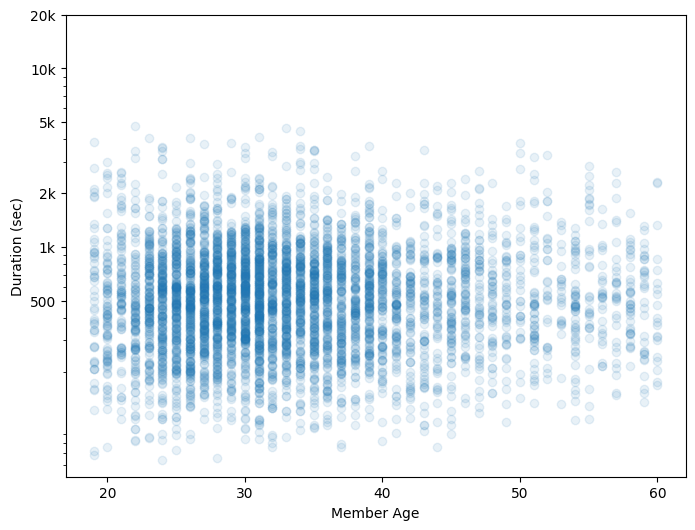

In [120]:
# scatter plot of duration_min vs. member_age
samples = np.random.choice(df_clean.index, 5000, replace=False)  # Use df_clean.index
samp = df_clean.loc[samples, :]

plt.figure(figsize=[8, 6])
plt.scatter(data=samp, x='member_age', y='duration_sec', alpha=0.1)
plt.xlabel('Member Age')
plt.yscale('log')

plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.ylabel('Duration (sec)')
plt.show()


Although we are still not seeing linear relationship between duration_sec and member_age, the data looks distribute more even compared to the scatter plot drawn eariler.

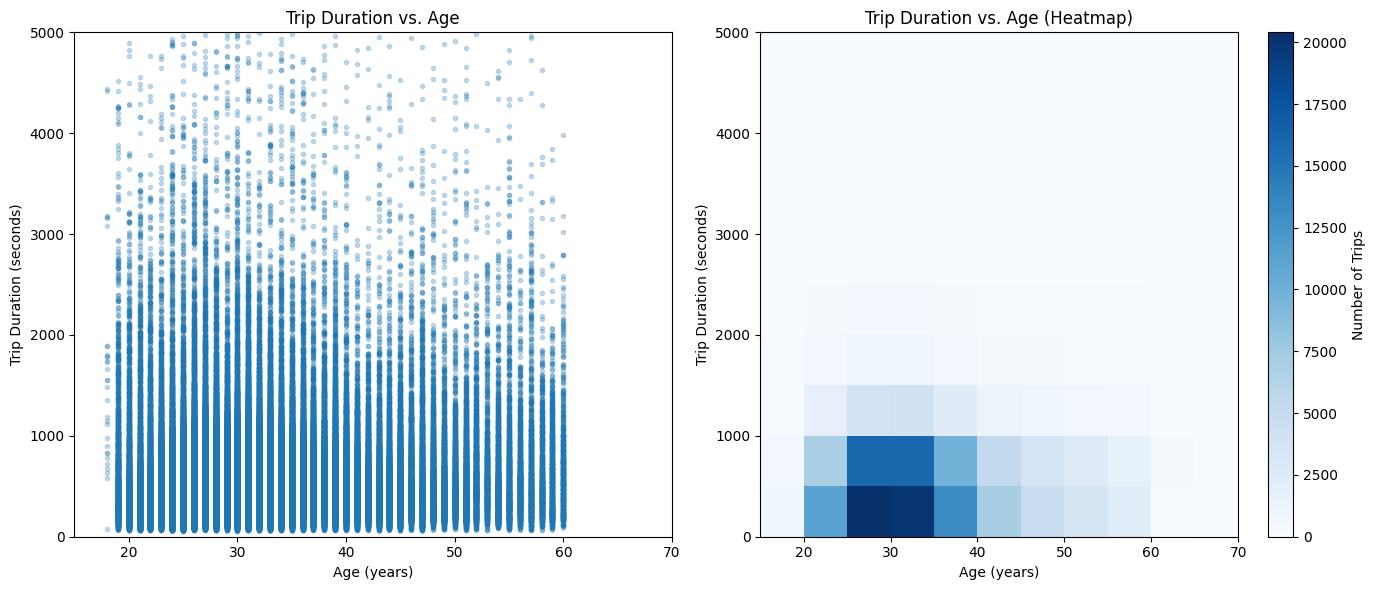

In [121]:
plt.figure(figsize=[14, 6])

# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(df_clean['member_age'], df_clean['duration_sec'], alpha=0.25, marker='.')
plt.title('Trip Duration vs. Age')
plt.xlabel('Age (years)')
plt.ylabel('Trip Duration (seconds)')
plt.axis([15, 70, 0, 5000])

# Heatmap
plt.subplot(1, 2, 2)
bins_y = np.arange(0, 5000 + 500, 500)
bins_x = np.arange(15, 70 + 5, 5)
plt.hist2d(df_clean['member_age'], df_clean['duration_sec'], bins=[bins_x, bins_y], cmap='Blues')
plt.colorbar(label='Number of Trips')
plt.title('Trip Duration vs. Age (Heatmap)')
plt.xlabel('Age (years)')
plt.ylabel('Trip Duration (seconds)')

plt.tight_layout()
plt.show()


> By looking at the chart above, we can see that most frequent users aged between 20 and 45. As remark, duration is registered by younger members.

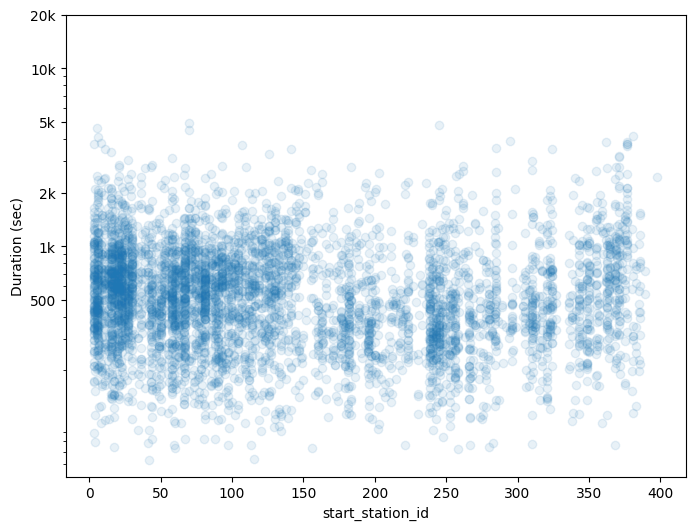

In [122]:
# scatter plot of duration_min vs. start_station_id 
samples = np.random.choice(df_clean.index, 5000, replace=False)  # Use df_clean.index
samp = df_clean.loc[samples, :]

plt.figure(figsize=[8, 6])
plt.scatter(data=samp, x='start_station_id', y='duration_sec', alpha=0.1)
plt.xlabel('start_station_id')
plt.yscale('log')

plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.ylabel('Duration (sec)')
plt.show()


In [123]:

def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

df_clean['log_duration_sec'] = df_clean['duration_sec'].apply(log_trans)

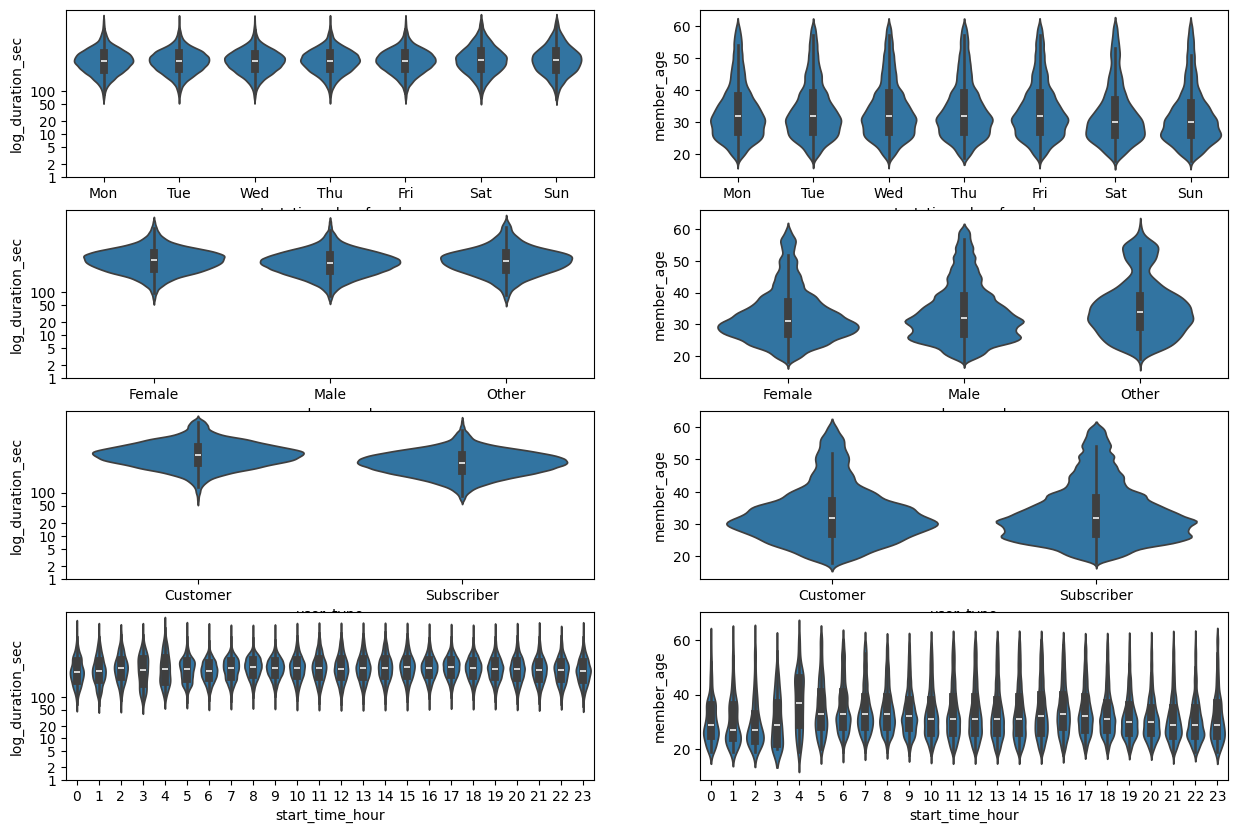

In [124]:

# plot the categorical variables against duration_min and member_age again, this time
# with full data and variable transforms
fig, ax = plt.subplots(ncols = 2, nrows = 4 , figsize = [15,10])

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sns.violinplot(data = df_clean, x = var, y = 'log_duration_sec', ax = ax[i,0]);
    ax[i,0].set_yticks(log_trans(np.array([1, 2, 5, 10, 20, 50, 100])));
    ax[i,0].set_yticklabels([1, 2, 5, 10, 20, 50, 100]);
    sns.violinplot(data = df_clean, x = var, y = 'member_age', ax = ax[i,1]);
plt.show()

**Observations:**

> - The shapes of the violins in the plots on the left side (with 'log_duration_sec' as y-axis) are more even compared to the shapes of the violins in the plots on the right side (with member_age as y-axis). The transformation make the violins on the left side looks more even.
> - Look at the plot on 1st row, 1st column: there are more bike rides with durations close to mean duration time (10 minutes) on the weekdays compared to the bike rides on the weekends.
> - Look at the plot on 3rd row, 1st column: the mean bike duration for female cyclists is longer than the the mean duration of the male cyclists.
> - Look at the plot on 4th row, 1st column: the mean bike duration for customer type cyclists is longer than the the mean duration of the subscriber type cyclists.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

**Relationships with Features of Interest**
> 1. Trip Duration (duration_sec) vs. Member Age (member_age):
>      - The scatter plot revealed that younger riders (ages 20–40) tend to have shorter trip durations compared to older age groups.
>      - A log transformation on trip duration clarified patterns and outliers, as some trips had unusually long durations.

> 2.Trip Start Time (start_time_hour) vs. User Type:

>       - Peak travel times (8–9 AM and 5–6 PM) were dominated by subscribers, suggesting their usage is aligned with commuting patterns.
>       - Casual users had a more even distribution of start times throughout the day, likely tied to recreational use.

> 3. Trip Start Time (start_time_hour) vs. Member Gender:
>      - Male riders were the majority across most hours.
>      - Female riders followed a similar pattern but were less represented overall.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

**Other Interesting Relationships**
> 1. Member Age Distribution:
>     - Members aged 30–40 constituted the majority, with a gradual decline in the number of riders as age increased.
>     - Few riders were under 20 or above 60, indicating that the service primarily caters to middle-aged individuals.

> 2. User Type (user_type) vs. Gender:
>     - Subscriber-type users were predominantly male.
>     - Female riders were more likely to be casual users than subscribers, compared to their male counterparts.

> 3. Station-Based Trends:
>      - Certain stations had higher trip frequencies, particularly in areas near central business districts or popular recreational zones.
>      - Starting and ending station IDs showed a correlation, indicating many trips began and ended at the same location (likely for recreational loops).

> 4. Day of Week Trends:
>       - Weekdays had a higher volume of trips by subscribers, consistent with commuting patterns.
>       - Weekends saw a rise in casual user activity, likely driven by leisure trips.


### **Insights**
>  - The dataset suggests that bike-sharing services primarily serve urban commuters and recreational riders, with distinct patterns across time, age, and user type.
>  - Outliers in trip duration and user behavior indicate opportunities for targeted analysis (e.g., identifying unusually long trips or underutilized stations).

## Multivariate Exploration

> The main thing I want to explore in this part of the analysis is how the three categorical measures of user type and gender into the relationship between trip duration and age.

In [125]:
def hist2dgrid(x, y, **kwargs):
    """Create heatmaps with seaborn's PairGrid."""
    cmap = kwargs.get('cmap', 'inferno')  # Use 'cmap' argument for color palette
    bins_x = np.arange(18, df_clean['member_age'].max() + 2, 2)  # Define bins for member age
    bins_y = np.logspace(0, np.log10(20_000), 50)  # Log-spaced bins for duration (log scale)
    
    # Create the 2D histogram
    plt.hist2d(x, y, bins=[bins_x, bins_y], cmap=cmap, cmin=0.5)
    plt.yscale('log')  # Set y-axis to logarithmic scale
    plt.colorbar(label='Count')  # Add a colorbar


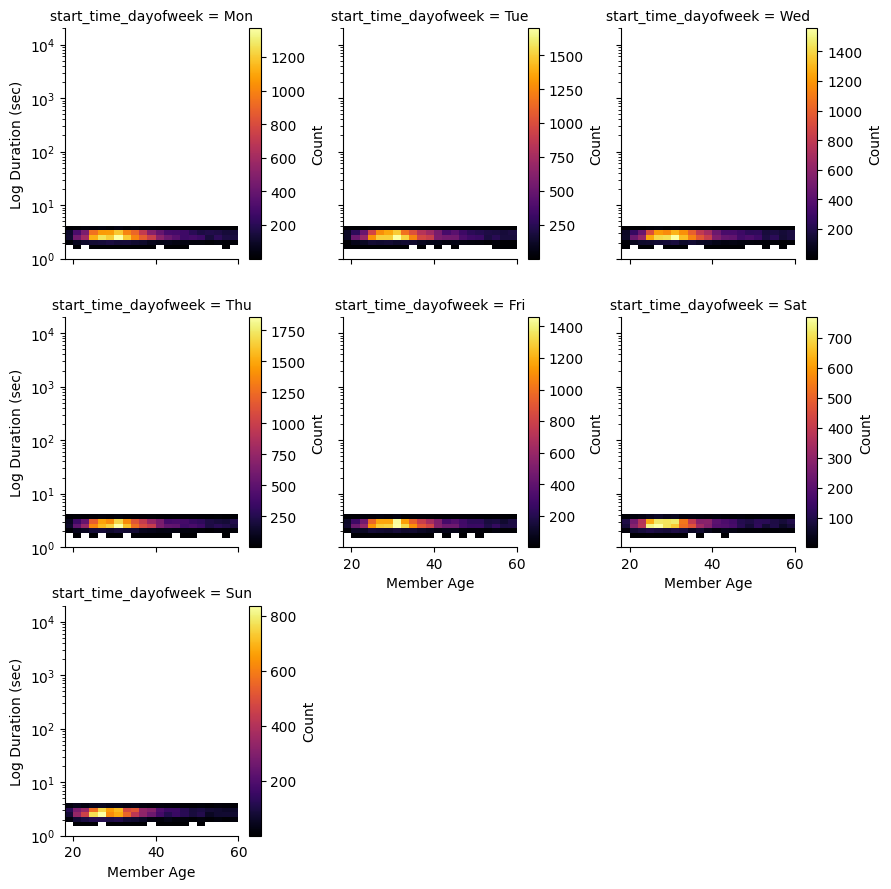

In [126]:
# Create faceted heatmaps for each day of the week
g = sns.FacetGrid(data=df_clean, col='start_time_dayofweek', col_wrap=3, height=3)
g.map(hist2dgrid, 'member_age', 'log_duration_sec', cmap='inferno')  # Pass color map
g.set_xlabels('Member Age')  # Label for x-axis
g.set_ylabels('Log Duration (sec)')  # Label for y-axis
plt.show()


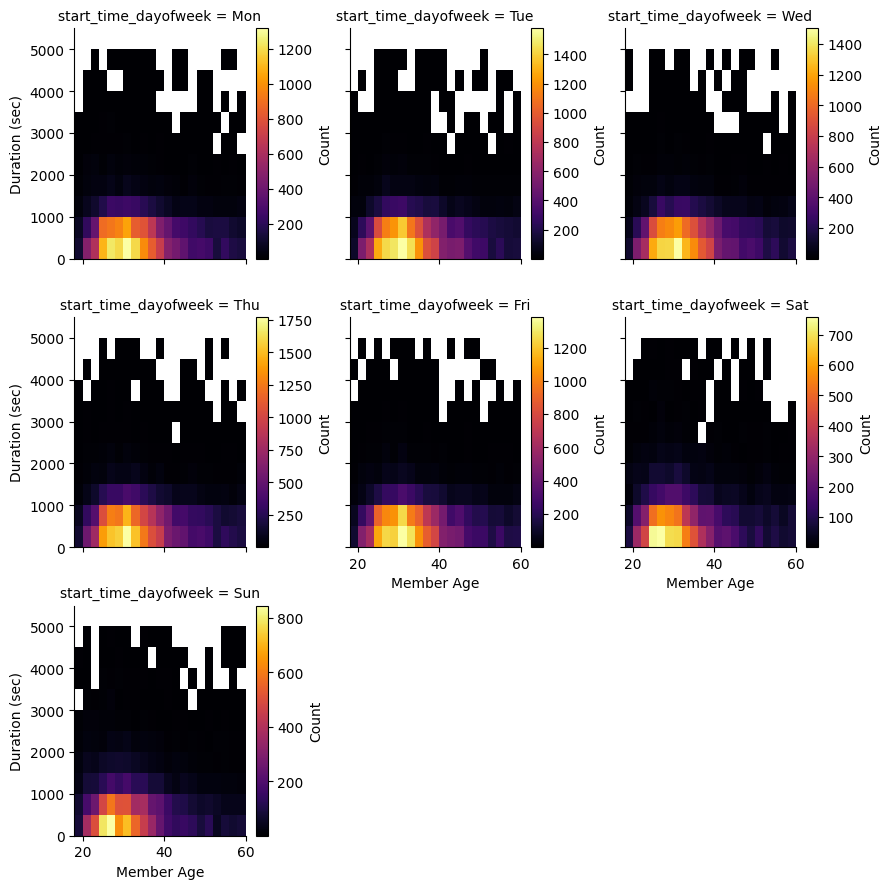

In [127]:
def hist2dgrid(x, y, **kwargs):
    """Create heat maps using Seaborn's PairGrid."""
    cmap = kwargs.get('cmap', 'inferno')  # Use 'cmap' argument for color palette
    bins_x = np.arange(18, df_clean['member_age'].max() + 2, 2)  # Define bins for member age
    bins_y = np.arange(0, df_clean['duration_sec'].max() + 500, 500)  # Linear bins for duration_sec
    
    # Create the 2D histogram
    plt.hist2d(x, y, bins=[bins_x, bins_y], cmap=cmap, cmin=0.5)
    plt.colorbar(label='Count')  # Add a colorbar for clarity
    plt.ylim(0, df_clean['duration_sec'].max() + 500)  # Set y-axis limit for clarity

# Create faceted heatmaps for each day of the week
g = sns.FacetGrid(data=df_clean, col='start_time_dayofweek', col_wrap=3, height=3)
g.map(hist2dgrid, 'member_age', 'duration_sec', cmap='inferno')  # Pass color map
g.set_xlabels('Member Age')  # Label for x-axis
g.set_ylabels('Duration (sec)')  # Label for y-axis
plt.show()


- **Visualization:** A grid of 2D histograms showing trip duration vs. member age for each day of the week.
- **Observations:**
  - Younger riders (ages 20–40) consistently have shorter trip durations across all days.
  - Weekends show a broader distribution of trip durations, possibly reflecting more recreational usage.
  - Trips on weekdays are concentrated in specific duration ranges, aligning with commuter behavior.

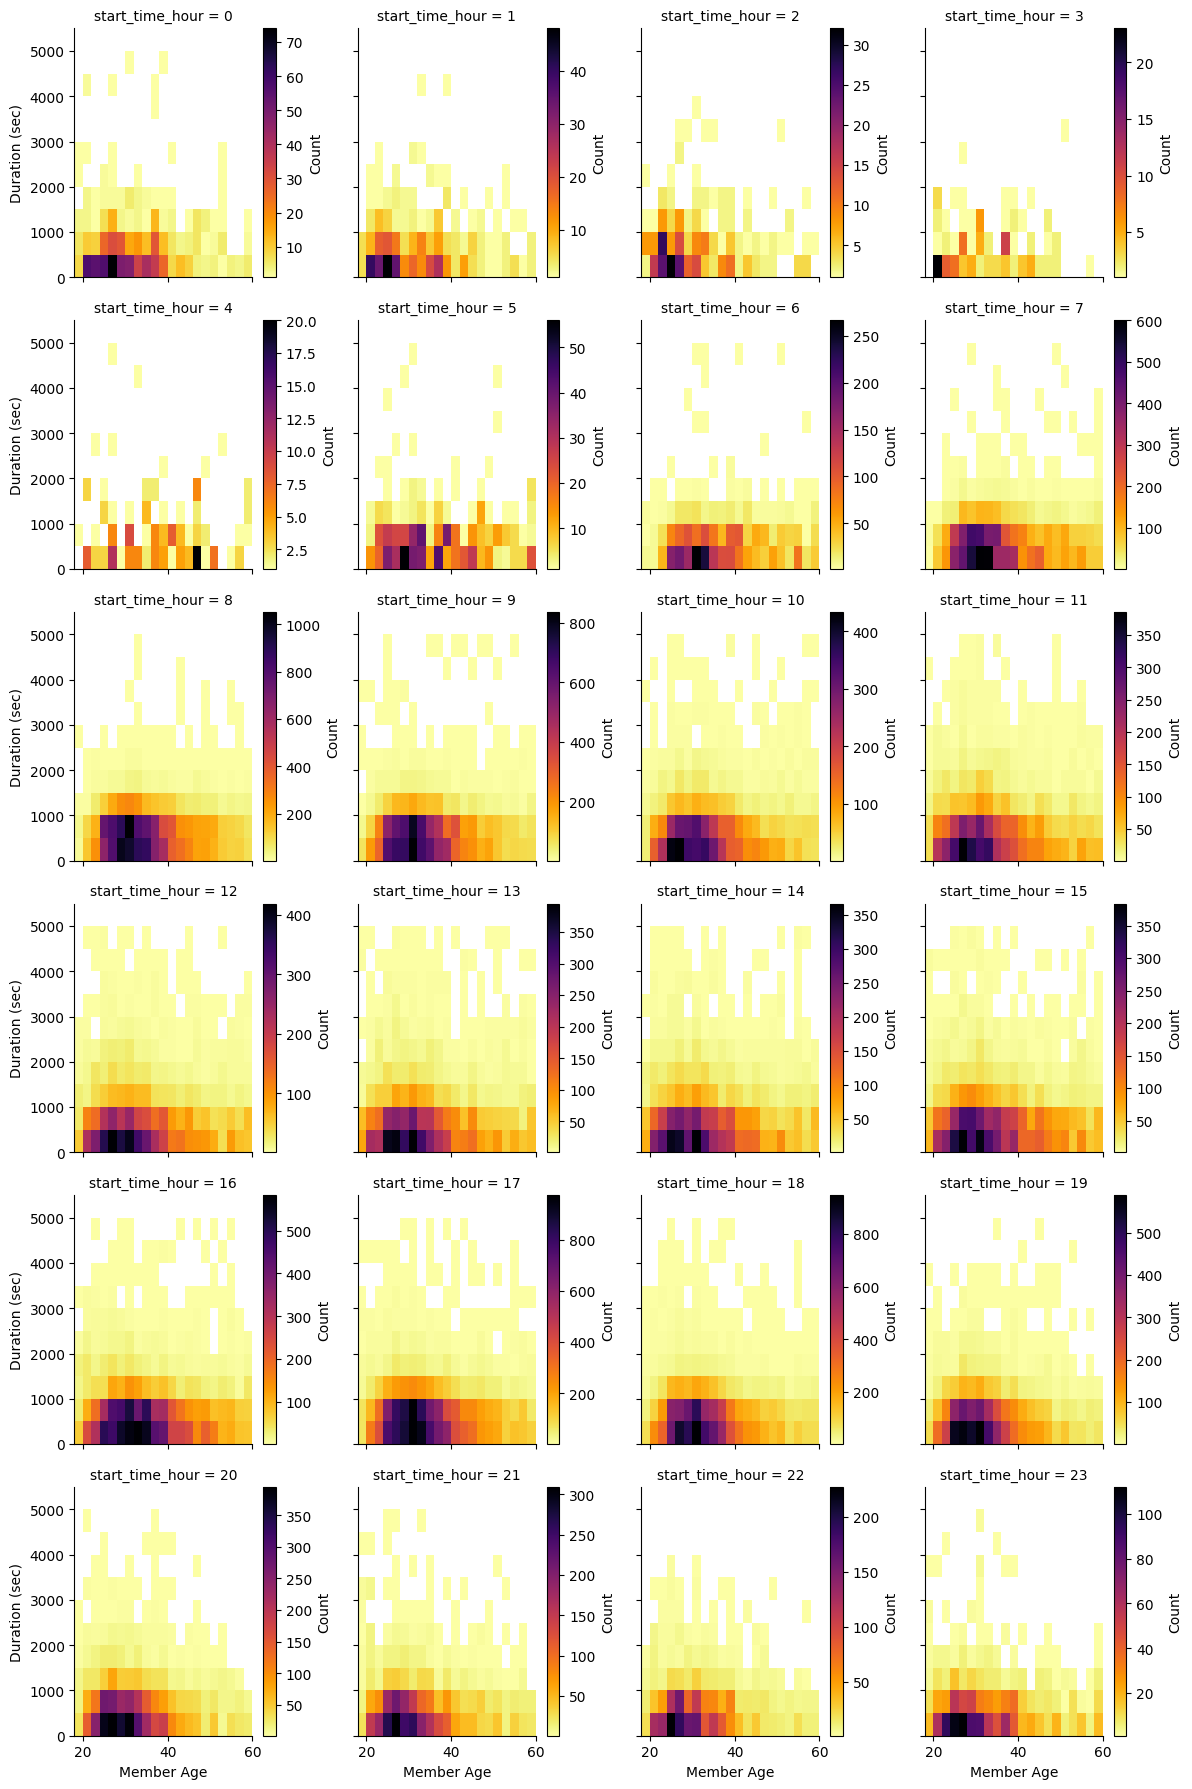

In [128]:
# Create faceted heatmaps for each hour of the day
g = sns.FacetGrid(data=df_clean, col='start_time_hour', col_wrap=4, height=3)
g.map(hist2dgrid, 'member_age', 'duration_sec', cmap='inferno_r')  # Pass color map
g.set_xlabels('Member Age')  # Label for x-axis
g.set_ylabels('Duration (sec)')  # Label for y-axis
plt.show()


- **Visualization:** A grid of 2D histograms showing trip duration vs. member age for each hour of the day.
- **Observations:**
  - Peak commuter hours (8–9 AM and 5–6 PM) have a higher density of shorter trips by younger riders.
  - Non-peak hours show a wider spread in trip durations, particularly among older age groups.
  - Riders above 50 years tend to have fewer trips during peak hours but longer trip durations overall.

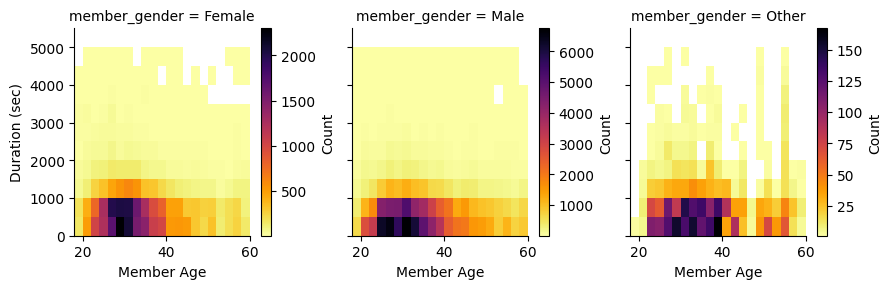

In [129]:
# Create faceted heatmaps for each gender
g = sns.FacetGrid(data=df_clean, col='member_gender', height=3)
g.map(hist2dgrid, 'member_age', 'duration_sec', cmap='inferno_r')  # Pass color map
g.set_xlabels('Member Age')  # Label for x-axis
g.set_ylabels('Duration (sec)')  # Label for y-axis
plt.show()


- **Visualization:** 2D histograms showing trip duration vs. member age for each gender.
- **Observations:**
  - Male riders dominate across all age groups and duration ranges.
  - Female riders have fewer trips overall but exhibit similar patterns, with shorter trips being more common.
  - Other/unspecified genders have limited data, resulting in sparser distributions.

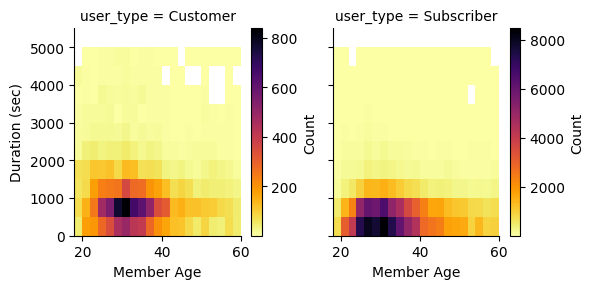

In [130]:
# Create faceted heatmaps for each user type
g = sns.FacetGrid(data=df_clean, col='user_type', height=3)
g.map(hist2dgrid, 'member_age', 'duration_sec', cmap='inferno_r')  # Pass color map
g.set_xlabels('Member Age')  # Label for x-axis
g.set_ylabels('Duration (sec)')  # Label for y-axis
plt.show()

- **Visualization:** 2D histograms showing trip duration vs. member age for subscribers and casual users.
- **Observations:**
  - Subscribers have shorter trips concentrated among younger members, indicative of regular commuting behavior.
  - Casual users show a wider distribution of trip durations and ages, suggesting a mix of recreational and occasional usage.


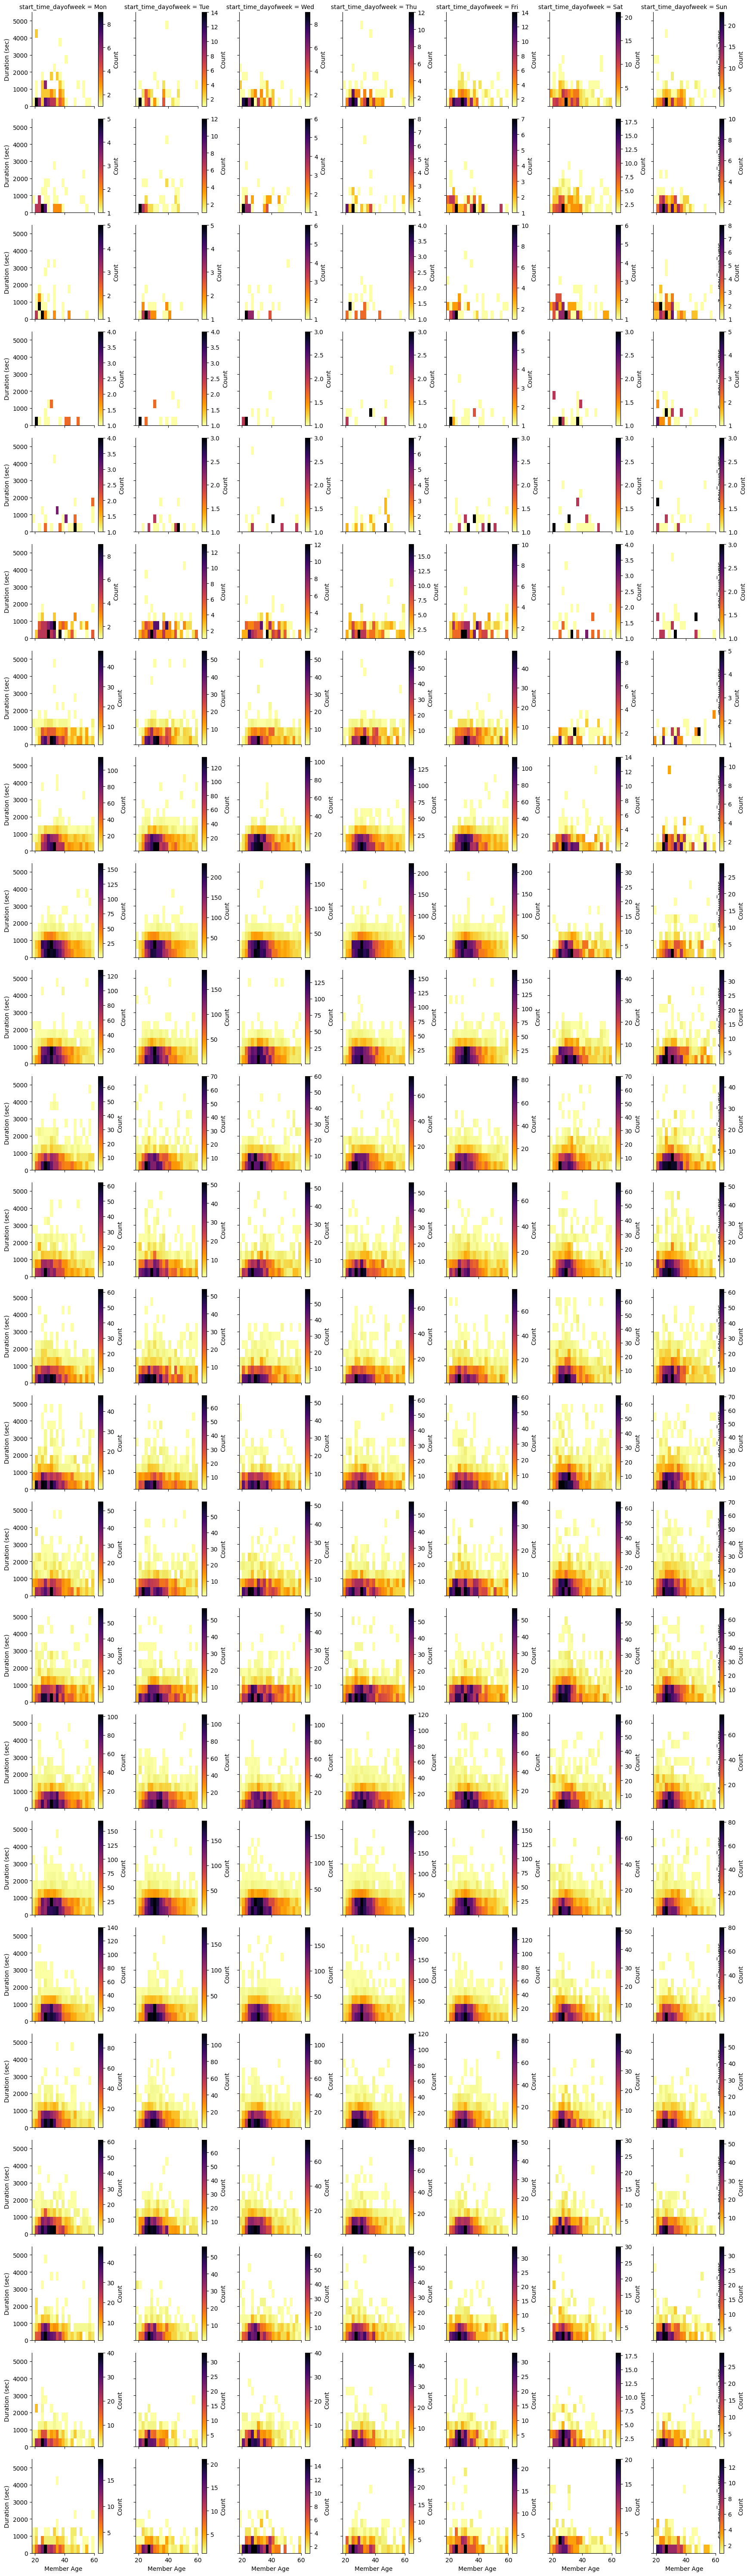

In [131]:

# Create faceted heat maps on start_time_dayofweek and start_time_hour
g = sns.FacetGrid(data=df_clean, col='start_time_dayofweek', row='start_time_hour', height=2.5, margin_titles=True)
g.map(hist2dgrid, 'member_age', 'duration_sec', cmap='inferno_r')  # Use duration_sec for linear values
g.set_xlabels('Member Age')  # Label for x-axis
g.set_ylabels('Duration (sec)')  # Label for y-axis
plt.show()

- **Visualization:** A detailed grid of heatmaps showing trip duration vs. member age for each combination of day and hour.
- **Observations:**
  - Morning and evening peaks on weekdays show dense clusters of shorter trips by younger riders.
  - Midday on weekends sees a broader spread of trip durations and ages, reflecting recreational activity.
  - Late-night trips are sparse but show higher variability in duration.


> These visualizations highlight distinct patterns in trip duration and member age influenced by factors such as time of day, day of the week, gender, and user type. Subscribers exhibit more structured behavior, while casual users have diverse trip patterns.

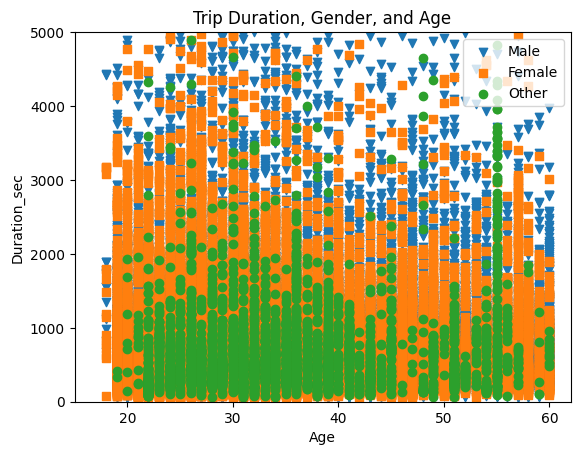

In [132]:
gender_mark = [['Male', 'v'],['Female', 's'],['Other', 'o']]

for gender, marker in gender_mark:
    df_gender = df_clean[df_clean['member_gender'] == gender]
    plt.scatter(df_gender['member_age'], df_gender['duration_sec'], marker = marker, alpha= 1)
plt.legend(['Male','Female','Other'])
plt.axis([15, 62, 0, 5000 ])
plt.title('Trip Duration, Gender, and Age')
plt.xlabel('Age')
plt.ylabel('Duration_sec')
plt.show()


**Observation:**
> - Male riders dominate across all age groups and duration ranges.
> - Female riders have shorter trip durations overall, with fewer long trips.
> - Other/unspecified genders have limited data points, showing less clear trends.

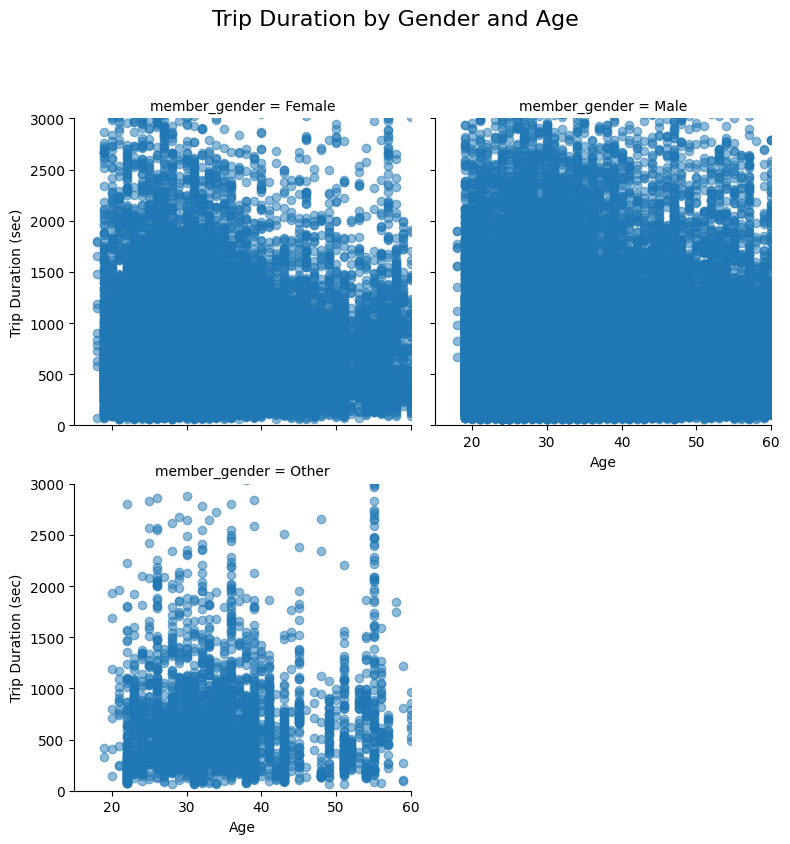

In [133]:
gender = sns.FacetGrid(data=df_clean, col='member_gender', col_wrap=2, 
                       xlim=[15, 60], ylim=[0, 3000], height=4)
gender.map(plt.scatter, 'member_age', 'duration_sec', alpha=0.5)
gender.set_xlabels('Age')
gender.set_ylabels('Trip Duration (sec)')
gender.fig.suptitle('Trip Duration by Gender and Age', y=1.05, fontsize=16)
plt.tight_layout()
plt.show()



**Observation:**
> - Male and female riders share similar patterns of short trip durations.
> - Variability in trip duration increases slightly for older age groups across genders.
> - Other gender category data is sparse and does not show clear patterns.


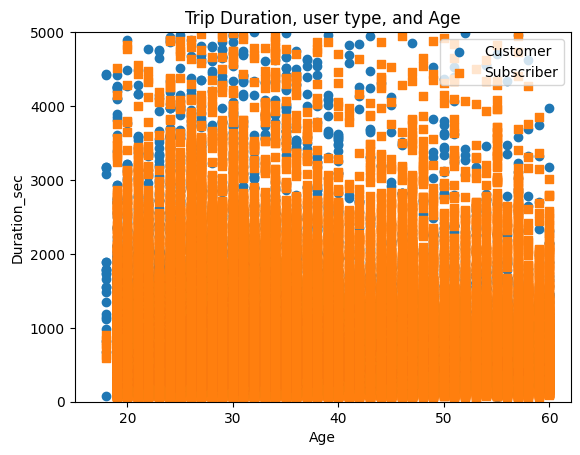

In [134]:
usertype_mark = [['Customer', 'o'],['Subscriber', 's']]

for utype, marker in usertype_mark:
    df_utype = df_clean[df_clean['user_type'] == utype]
    plt.scatter(df_utype['member_age'], df_utype['duration_sec'], marker = marker, alpha= 1)
plt.legend(['Customer','Subscriber'])
plt.axis([15, 62, 0, 5000 ])
plt.title('Trip Duration, user type, and Age')
plt.xlabel('Age')
plt.ylabel('Duration_sec')
plt.show()

**Observation:**
> - Subscribers tend to have shorter trip durations across all age groups.
> - Customers have more variability in trip durations, particularly at younger ages.
> - The majority of trips by both user types are under 5,000 seconds.

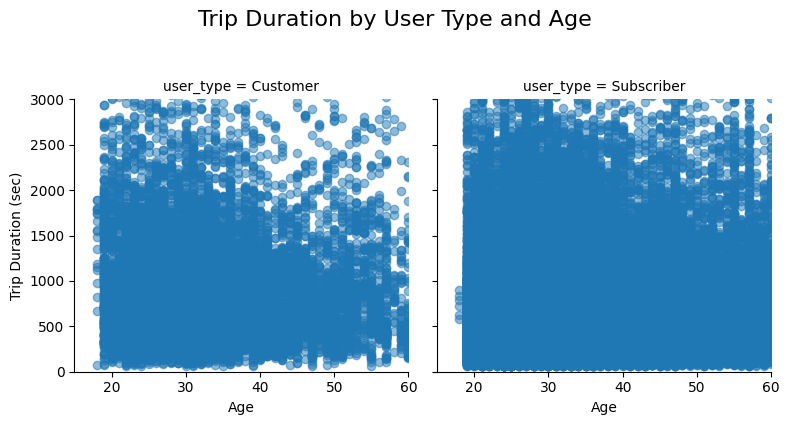

In [135]:
user_type = sns.FacetGrid(data=df_clean, col='user_type', col_wrap=2, 
                          xlim=[15, 60], ylim=[0, 3000], height=4)
user_type.map(plt.scatter, 'member_age', 'duration_sec', alpha=0.5)
user_type.set_xlabels('Age')
user_type.set_ylabels('Trip Duration (sec)')
user_type.fig.suptitle('Trip Duration by User Type and Age', y=1.05, fontsize=16)
plt.tight_layout()
plt.show()


**Observation:**
> - Subscribers show dense clusters of shorter trips, especially for younger riders.
> - Customers exhibit wider variability in trip durations, likely reflecting recreational usage.
> - Across user types, shorter trips dominate, particularly for riders aged 20–40.

**Let's devide bikers into 2 groups by age: one group has cyclists below 40 years old, another group has cyclists above 40 years old.**

In [136]:
age_flag1 = (df_clean['member_age'] < 40)
age_below_forty = df_clean.loc[age_flag1,:]

age_flag2 = (df_clean['member_age'] >= 40)
age_above_forty = df_clean.loc[age_flag2,:]

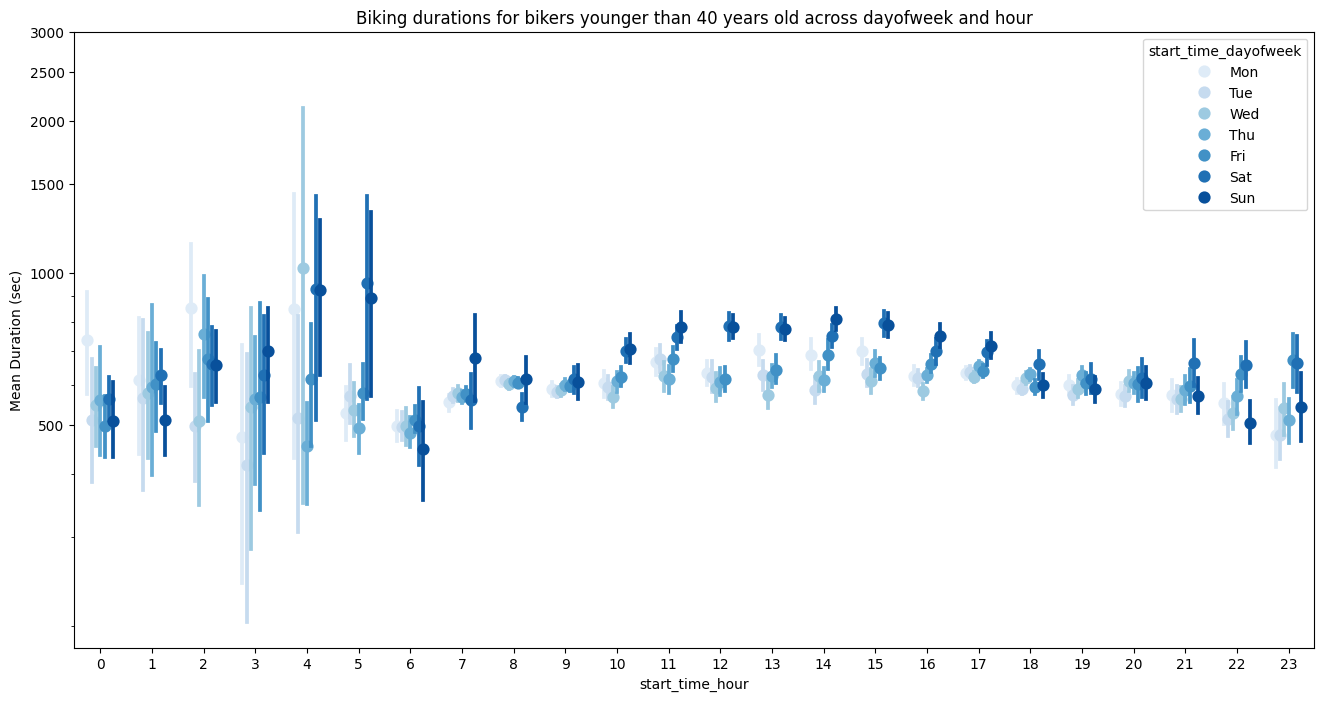

In [137]:
fig = plt.figure(figsize = [16,8])

ax = sns.pointplot(data = age_below_forty, x = 'start_time_hour', y = 'duration_sec', hue = 'start_time_dayofweek',
           palette = 'Blues', linestyles = '', dodge = 0.5);

plt.title('Biking durations for bikers younger than 40 years old across dayofweek and hour');
plt.ylabel('Mean Duration (sec)');
plt.yscale('log');
plt.yticks([500,1000,1500,2000,2500,3000], [500,1000,1500,2000,2500,3000]);
ax.set_yticklabels([],minor = True);

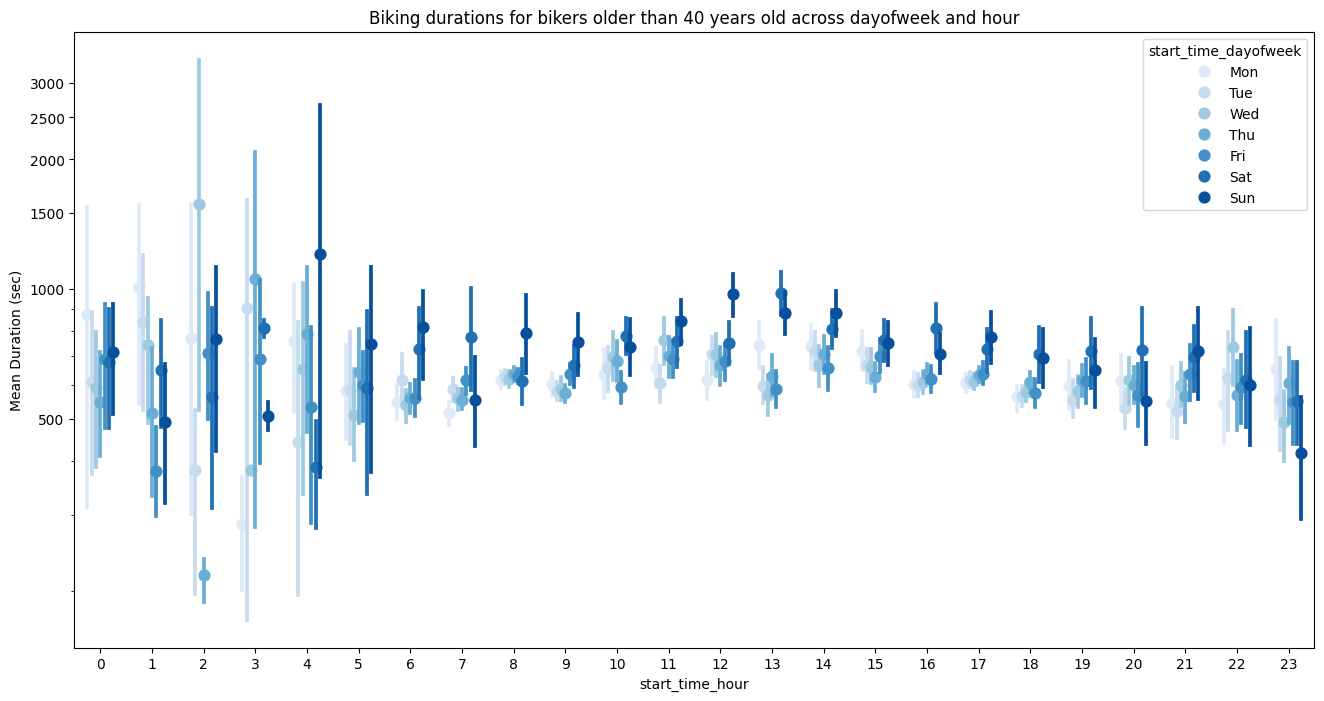

In [138]:
fig = plt.figure(figsize = [16,8])

ax = sns.pointplot(data = age_above_forty, x = 'start_time_hour', y = 'duration_sec', hue = 'start_time_dayofweek',
           palette = 'Blues', linestyles = '', dodge = 0.5);

plt.title('Biking durations for bikers older than 40 years old across dayofweek and hour');
plt.ylabel('Mean Duration (sec)');
plt.yscale('log');
plt.yticks([500,1000,1500,2000,2500,3000], [500,1000,1500,2000,2500,3000]);
ax.set_yticklabels([],minor = True);

**Observations:**
> - By looking at the errorbars in both pointplots, we can tell that there are more younger cyclists (age < 40) across 7 days and 24 hours.
> - Cyclists on Saturdays and Sundays ride longer than cyclists on other days.

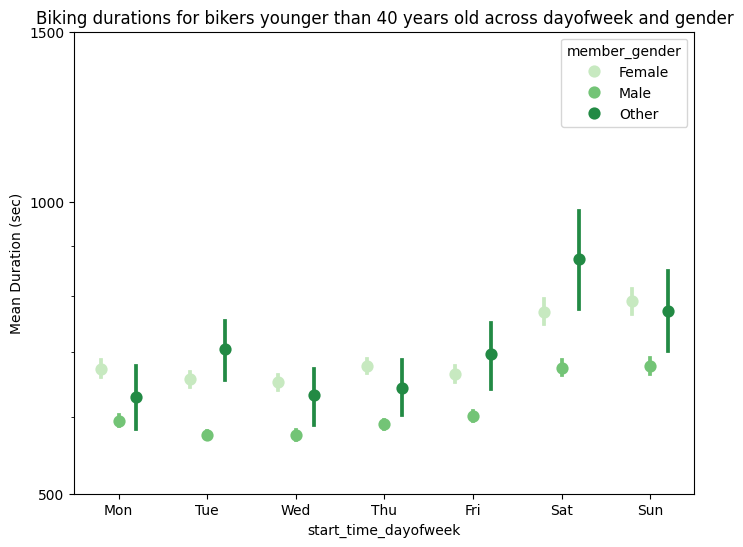

In [139]:
fig = plt.figure(figsize = [8,6]);

ax = sns.pointplot(data = age_below_forty, x = 'start_time_dayofweek', y = 'duration_sec', hue = 'member_gender', 
                  palette = 'Greens', linestyles = '', dodge = 0.4);

plt.title('Biking durations for bikers younger than 40 years old across dayofweek and gender');
plt.ylabel('Mean Duration (sec)');
plt.yscale('log');
plt.yticks([500,1000,1500], [500,1000,1500]);
ax.set_yticklabels([],minor = True);

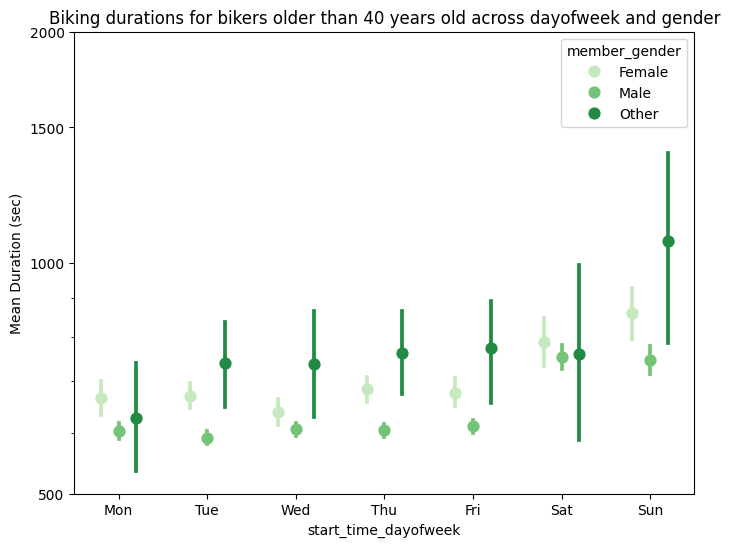

In [140]:
fig = plt.figure(figsize = [8,6]);

ax = sns.pointplot(data = age_above_forty, x = 'start_time_dayofweek', y = 'duration_sec', hue = 'member_gender', 
                  palette = 'Greens', linestyles = '', dodge = 0.4);

plt.title('Biking durations for bikers older than 40 years old across dayofweek and gender');
plt.ylabel('Mean Duration (sec)');
plt.yscale('log');
plt.yticks([500,1000,1500,2000], [500,1000,1500,2000]);
ax.set_yticklabels([],minor = True);

**Observations:**

> - By looking at the errorbars (first plot, other cyclists; second plot, female cyclists and other cyclists) in both pointplots, we can tell that there are less cyclists who are older than 40 years old.
> - Female cyclists ride longer than male cyclists.

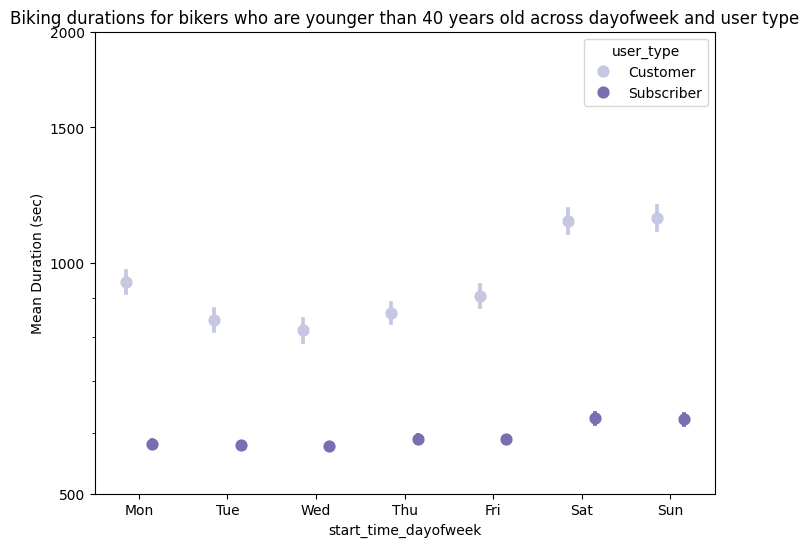

In [141]:
fig = plt.figure(figsize = [8,6])
ax = sns.pointplot(data = age_below_forty, x = 'start_time_dayofweek', y = 'duration_sec', hue = 'user_type',
           palette = 'Purples', linestyles = '', dodge = 0.3);
plt.title('Biking durations for bikers who are younger than 40 years old across dayofweek and user type');
plt.ylabel('Mean Duration (sec)')
plt.yscale('log');
plt.yticks([500,1000,1500,2000], [500,1000,1500,2000]);
ax.set_yticklabels([],minor = True);

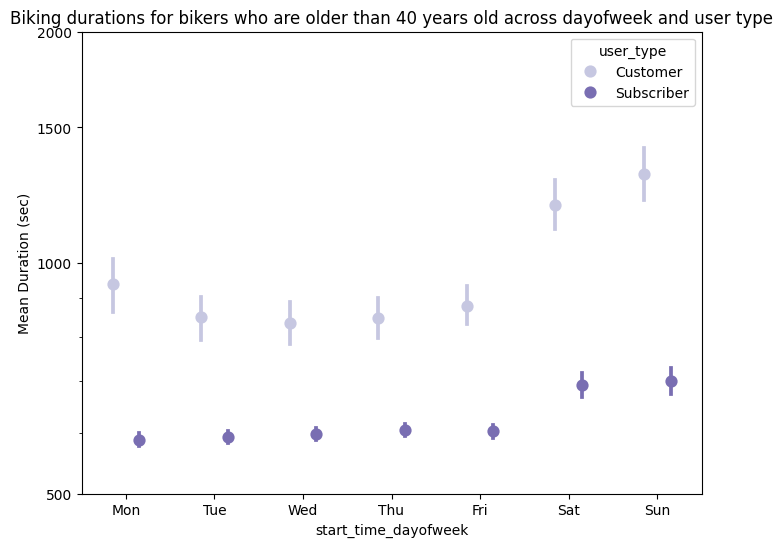

In [142]:
fig = plt.figure(figsize = [8,6]);
ax = sns.pointplot(data = age_above_forty, x = 'start_time_dayofweek', y = 'duration_sec', hue = 'user_type',
           palette = 'Purples', linestyles = '', dodge = 0.3);
plt.title('Biking durations for bikers who are older than 40 years old across dayofweek and user type');
plt.ylabel('Mean Duration (sec)');
plt.yscale('log');
plt.yticks([500,1000,1500,2000], [500,1000,1500,2000]);
ax.set_yticklabels([],minor = True);

**Observations:**

> - By looking at the errorbars in both pointplots, we can tell that there are less cyclists who are older than 40 years old.
> - Customer type cyclists ride longer than subscriber type cyclists.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

#### Relationships Observed
- **Age and Trip Duration**: Younger riders (ages 20–40) consistently recorded shorter trip durations, particularly on weekdays. This aligns with regular commuting behavior.
- **Day of the Week and Trip Duration**: Weekends exhibited longer and more varied trip durations compared to weekdays, suggesting recreational or leisure-oriented usage.
- **User Type and Trip Duration**: Subscribers predominantly had shorter trip durations, indicating habitual, utility-driven trips. In contrast, casual users showed a broader distribution, reflective of occasional or exploratory use.
- **Gender and Trip Duration**: Male riders dominated across all categories. Female riders showed slightly longer trip durations on average, particularly on weekends.

#### Strengthened Relationships
- **User Type and Age**: Subscribers under 40 exhibited concentrated patterns of short trips, reinforcing the idea of routine commuting.
- **Day of the Week and User Type**: On weekdays, subscribers showed highly structured patterns of shorter trips, while casual users exhibited greater variability, especially on weekends.
- **Gender and Day of the Week**: Female riders appeared to have slightly longer trips on weekends, particularly in the recreational time frames.


### Were there any interesting or surprising interactions between features?

#### Surprising Interactions
- **Peak Hours and Age**: While younger riders had higher densities of shorter trips during peak hours, older riders had longer trips overall, even during non-peak hours. This suggests a difference in trip purpose between age groups.
- **Gender and Duration**: Although male riders outnumbered others, female riders often recorded longer average trip durations, particularly for older age groups. This was unexpected given the smaller sample size for female riders.
- **Casual Users on Weekdays**: Some casual users exhibited trip durations similar to subscribers on weekdays, which might indicate overlap in usage patterns, such as tourists commuting or new users trying the service.

### Reflection
These interactions reveal nuanced usage patterns among different demographics and user types. They highlight how specific features (e.g., age, user type, and time) work together to shape trip characteristics.

## Conclusions

### Summary of Main Findings
1. **Trip Duration and Age**: 
   - Younger riders (20–40 years) took shorter trips, with durations decreasing further during peak commuter hours.
   - Older riders (40+ years) tended to have longer trips, particularly during non-peak hours.

2. **Day of the Week and Trip Purpose**: 
   - Weekdays showed concentrated, shorter trips consistent with commuting patterns.
   - Weekends exhibited broader trip durations, likely reflecting recreational use.

3. **User Types**: 
   - Subscribers predominantly had shorter, structured trips, aligning with routine commuting.
   - Casual users showed a diverse range of trip durations and ages, suggesting more recreational or occasional use.

4. **Gender Differences**: 
   - Male riders dominated across all age and duration categories.
   - Female riders took fewer trips but often recorded longer average durations, especially on weekends.
   - Other/unspecified genders showed sparse data, limiting insights.

5. **Time of Day Patterns**: 
   - Morning and evening peak hours were dominated by younger riders taking short trips.
   - Midday hours, especially on weekends, saw broader distributions of ages and trip durations.

6. **Interactive Insights**: 
   - Age, user type, and trip duration revealed clear behavioral distinctions, with structured, shorter trips by younger subscribers versus longer, variable trips by casual users.

---

### Reflection on Data Exploration Steps
- **Data Cleaning**: 
   - Successfully handled missing and inconsistent values (e.g., member gender, trip duration outliers). 
   - Introduced computed features such as member age and log-transformed trip durations for better analysis.

- **Univariate Exploration**: 
   - Observed central tendencies and distribution of individual features like age, trip duration, and user types.

- **Bivariate Exploration**: 
   - Identified correlations between trip duration and factors like age, gender, and user type.

- **Multivariate Exploration**: 
   - Revealed complex interactions involving time of day, day of the week, and demographic variables.
   - Heatmaps and scatterplots facilitated insights into rider behavior across categories.

This exploration uncovered key behavioral patterns among riders, helping to understand how demographic, temporal, and categorical factors shape trip characteristics.

In [143]:
# save cleaned data
df_clean.to_csv('clean_201902-fordgobike-tripdatae.csv', index=False)

In [144]:
from IPython.display import HTML

# JavaScript code to toggle raw code cells visibility
HTML('''
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()">
<input type="submit" value="Click here to toggle on/off the raw code.">
</form>
''')

# Export notebook as HTML or PDF
!jupyter nbconvert Part_I_exploration_template_(1).ipynb --to html --no-input --output=Part_I_exploration_template.html

[NbConvertApp] Converting notebook Part_I_exploration_template_(1).ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 34 image(s).
[NbConvertApp] Writing 5167810 bytes to Part_I_exploration_template.html
